<a href="https://colab.research.google.com/github/duchaba/demystify_nlp_data_tokenizer_d3tz/blob/main/NLP_Data_Tokenizer_d3tz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# OPTIONAL
# For Google Colab, (1) Open the "concole", e.g. right-click and inspect, (2) Copy the below scripts (from line #10 to #17) and run it.
#
# If you know how to hack Google Colab Jupyter notebook and run "javascripts" as-is below, 
#i.e., without the need for opening up the console, please share it with me.
#
# The Javascript is to highlight the code cells' input and output and the code-cells you have executed.
#
%%js
var head = document.head || document.getElementsByTagName("head")[0];
var style = document.createElement("style");
var css = ".inputarea.code{border-left: 4px solid #20c997;}.cell.focused .inputarea.code{border-left: 4px solid #d63384;}.cell .output{border-left: 4px solid #ffc107;}";
css = css + ":root { --colab-fresh-execution-count-color: #d63384;}";
css = css + ".markdown blockquote {border-left: 10px solid #fd7e14 !important;border-radius: 10px 0 0 10px;padding: 1em 1em 1em 1em;border-bottom: 1px solid #343845}"
css = css + " h1,h2,h3,h4,h5 {font-family:serif !important;}"
css = css + "h1{color:#e83e8c !important;;} h2{color:#20c997 !important;font-size:120%;} h3{color:#fd7e14 !important;font-size:120%;} h4{color:#6610f2 !important;}"
head.appendChild(style);
style.type = "text/css";
style.appendChild(document.createTextNode(css));


<IPython.core.display.Javascript object>

# 1 - Introduction

Welcome to the "Natural Language Processing (NLP) Deep Dive on Data and Tokenizer" project. The code name is "D3tz." It is a hackable, step-by-step Jupyter Notebook for investigating the data, separating them into a training set and a validation set, and tokenizing them. Furthermore, D3tz will reveal the data biases, both intentional and adventitious, and how it affects the NLP's accuracy.

The big bonus is a deep understanding of the input-data that will enable you to use the hyper-parameters effectively, such as, should I increase or decrease the "learning (fit) rate," the "dropout" rate, the "momentum" rate, or the discriminate learn-rate "percentage"?

I classify the D3tz as a "sandbox" or "toy" project. In other words, it is a fun, experimental project focusing on solving one problem.

When researching or learning about Artificial Neural Network (ANN), we are too often focusing on the "train" cycle, base architecture selection, hyper-parameters, and loss-error metric. Those factors are fundamental to NLP. However, the input-data affects the NLP's accuracy substantially. 

If you are new to ANN and not understanding the full cycle, from development to deployment, please read the "[Norwegian Blue Parrot, The k2fa" AI](https://nbp3-webclient-2020.web.app/)" article on LinkedIn.

As an AI scientist, I choose to be an expert in input-data, such as data analysis, data visualization, labeling, cleaning, augmentation, separating training and validation set, and foremost, revealing and clarifying intentional biases and adventitious biases. 

I often spend weeks, or months, on the input-data before writing the first Python code-line for the "training" cycle. The reason is that after a thorough review and visualize the input-data, I can predict the ANN accuracy against the business objectives before hands.  

After a handful of successful enterprise AI projects and dozens of AI projects for courses and Kaggle competitions, I gravitate to the input-data biases. For enterprise AI project, the success or failure is not on how well we trained the ANN model, but how the project achieved the business objective.

For example, I did a national bank project, and the ANN model achieved a 96.38% accuracy, a 3.62% loss. By the contract agreement, the ANN model surpassed the set goal. However, after the bank deployed the project, it was deemed a failure because, in large part, the real-world customer's input-data is substantially different from the giving input-data. 

Looking back, I should be more forceful in verbalizing the intentional biases that I have observed in the input-data. At that time, my employer said that I have successfully delivered an ANN model that exceeds the contractual client requirement, so "don't rock the boat."

The D3tz notebook is a deep dive in NLP, but the lesson learned is applied equally in image classification, image segmentation, or any other ANN project.



><center><h2><i>So if you are ready, let's take a collective calming breath …  … and begin.</i></h2></center>

# 2 - The Journey




- For this journey, the companion's name is "Henna." It is because she looks like a "hen" with a "na" following it. 

- Typically a dog name is chosen, e.g., "Lefty," "Zeta," or "Gamma," but be warned, don't name it after your cat because a "cat" will not follow any commands.


- Naturally, as with other sandbox projects, you should hack the notebook and change the name to your preference.

- As a good little programmer, Henna starts by creating an object or class.

- Henna uses the "river" coding style for all "sandbox" projects.

- The style uses a full library name, sub-class, and following by the function name. Jupyter notebook has auto-complete, so Henna can use the long-name and not misspelling them. The bonus is that when Henna type a dot (".") after an object, the list of possible methods and variables are displayed. 

- Henna is NOT using the global-space as in "import numpy *" or using the shorten name like "import matplotlibl.pyplot as ptl” instead of using the full {river} name as in “numpy.random.randint().”

- In addition, she shies away from using Python language-specific syntax shorthand, such as the “assigned if.”

- The primary reason for using the “river” coding style coupled with a descriptive naming convention is that it is easier to read, hack, and translate to Swift or Javascript.

- Henna is in the exploration journey, and therefore, she will considering code compaction and code optimization when she refactors them in the Python project using [Atom IDE](https://atom.io).

In [ ]:
import numpy
import scipy
import pathlib
import os
import pandas
import matplotlib

In [ ]:
class d3tz(object):
  #
  # initialize the object
  def __init__(self, name="Henna"):
    self.author = "Duc Haba"
    self.name = name
    self._ph()
    self._pp("Hello from", self.__class__.__name__)
    self._pp("Code name", self.name)
    self._pp("Author is", self.author)
    self._ph()
    return
  #
  # pretty print output name-value line
  def _pp(self, a, b):
    print("%40s : %s" % (str(a), str(b)))
    return
  #
  # pretty print the header or footer lines
  def _ph(self):
    print("-" * 40, ":", "-" * 40)
    return
  #
# ---end of d3tz class

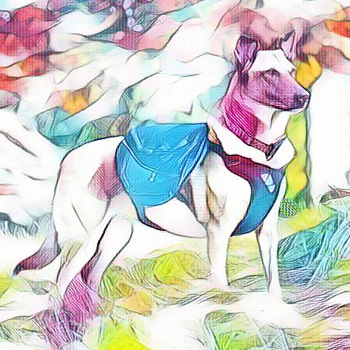 

- The website "[LunaPic](https://www5.lunapic.com/)" filters augmented Henna's picture.

In [ ]:
henna = d3tz("Henna")

---------------------------------------- : ----------------------------------------
                              Hello from : d3tz
                               Code name : Henna
                               Author is : Duc Haba
---------------------------------------- : ----------------------------------------


- The following is a clean version. Henna cleans up the tried-and-errors cells, but please don't let it stop you from inserting your code-cells and text-cells as we make this journey together. 

- When copying the code into the Atom's project, Henna would add the methods during the class definition, but in a notebook, we can hack-it and add new functions as need it. 

In [ ]:
# Hack it!
# add_method() is copy from Michael Garod's blog, 
# https://medium.com/@mgarod/dynamically-add-a-method-to-a-class-in-python-c49204b85bd6
# AND correction by: Филя Усков
#
import functools
def add_method(cls):
  def decorator(func):
    @functools.wraps(func) 
    def wrapper(self, *args, **kwargs): 
      return func(self,*args, **kwargs)
    setattr(cls, func.__name__, wrapper)
    return func # returning func means func can still be used normally
  return decorator

- Henna needs the input data, and this journey is not about gathering the data, so she takes the "IMDB movie reviews" as the data. The citations are as follows. 

1. @InProceedings{maas-EtAl:2011:ACL-HLT2011,

2. author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and
Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
3. title     = {Learning Word Vectors for Sentiment Analysis},
4. booktitle = {Proceedings of the 49th Annual Meeting of the Association for
Computational Linguistics: Human Language Technologies},
5. month     = {June},
6. year      = {2011},
7. address   = {Portland, Oregon, USA},
8. publisher = {Association for Computational Linguistics},
9. pages     = {142--150},
10. url       = {http://www.aclweb.org/anthology/P11-1015}

- Gathering data is not an easy task. It can take weeks or months. Many have asked Henna to join a fun Artificial Neural Network (ANN) journey, but it never gets started without data.

## 2.1 Detour to Find Our Friend Monty

- Monty is like Henna. He is a Python class refactored in the Atom project and stored in GitHub. 

- Monty is an alpha-dog, and therefore, he follows the same methodology. Hacked it in a Jupyter notebook and then copy and refactor in a Python Atom project.

- Monty is not a public Github project at this stage. However, Monty's code exists in many of Duc Haba's sandbox projects on Github.

- Monty uses "[fast.ai](https://fasta.ai)" library version 1.0.62.x from Jeremy Howard, Rachel Thomas, and Sylvain Gugger. Fast.ai library uses PyTorch version 1.6.x and Python 3.6.9.

- For this journey, Monty ability to draw 2D and 3D graphs will be handy. They were from previous journies, the "[Demystify Python 2D Charts](https://www.linkedin.com/pulse/demystify-python-charts-hackable-step-by-step-jupyter-duc-haba/)," and the "[3D Visualization](https://www.linkedin.com/pulse/python-3d-visualization-hackable-step-by-step-jupyter-duc-haba/)" sandbox projects.

In [ ]:
%%capture out_1
# load in fastai and pytorch. It is optional if are coding on your labtop
# load in fastai at May 1 2020 version
!pip install --upgrade git+https://github.com/duchaba/fastai.git
!pip install --upgrade git+https://github.com/duchaba/monty_NOT_AVAILABLE
# import Monty and create a monty instant. The preference is NOT using global space
import monty_fastai_v1.monty_fastai_util as monty_fastai_util
monty = monty_fastai_util.base_monty()

In [ ]:
# double checked
monty.print.sys_info()

---------------------------------------- : ----------------------------------------
                             System time : 2020/11/17 04:41
                                Platform : linux
                          Python version : 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
                         PyTorch version : 1.7.0+cu101
                     Fastai version is:  : 1.0.62.dev0
                           Monty version : 0.6.0
                               CPU count : 4
                              *CPU speed : NOT available
                               RAM total : 25.51 Gb
                                RAM free : 24.44 Gb, 95.8%
                                GPU-Cuda : True
                        Disk space total : 147.15 Gb
                         Disk space free : 116.62 Gb, 79.3%
                      Current directory: : /content
             Python import packages path : Full path below...
                                       + : 
                     

## 2.2 Back to The Main Journey

- Henna has a companion named Monty. He will do all the dirty works that do not directly pertain to this journey. If we spend time teaching Henna, then it will distract from the D3tz journey.

- Henna’s first two tasks are as follows.

1. Fetches the IMDB movie reviews.

2. Looks at the data directory and the files.

In [ ]:
import fastai
import fastai.text
@add_method(d3tz)
def fetch_data_imdb(self):
  #set up
  #url is from fast.ai course, "pratical deep learning for coder" lesson #2, https://fasta.ai
  self.url = fastai.datasets.URLs.IMDB
  self.data_path = pathlib.Path("data")
  #
  if os.path.isdir(self.data_path) == False:
    os.mkdir(self.data_path)
  # ask our playmate, Monty, to do the dirty works
  monty.fetch.data_fastai_classnote(self.url, self.data_path)
  return

In [ ]:
henna.fetch_data_imdb()

---------------------------------------- : ----------------------------------------
                        Source directory : data
          Display max file per directory : 4
data/
    imdb/
        README
        imdb.vocab
        unsup/
            0_0.txt
            10000_0.txt
            10001_0.txt
            10002_0.txt
            total files: 50000
        tmp_lm/
            classes.txt
            itos.pkl
            train_ids.npy
            train_lbl.npy
            total files: 6
        tmp_clas/
            classes.txt
            itos.pkl
            train_ids.npy
            train_lbl.npy
            total files: 6
        test/
            labeledBow.feat
            pos/
                0_10.txt
                10000_7.txt
                10001_9.txt
                10002_8.txt
                total files: 12500
            neg/
                0_2.txt
                10000_4.txt
                10001_1.txt
                10002_3.txt
                total fil

- Thanks to Monty for doing the heaving lifting behind the scene, the IMDB movie reviews are downloaded, and the directory is displayed. 

- At first glance, Henna finds the following.

1. The "train" and "test" directories have a "neg and pos" label as a sub-directory, which means "a negative and positive review." Henna will use the "test" as our "validate" set, and each has 12,500 text files, i.e., movie reviews.

2. The "unsup" directory has 50,000 text files, which might be necessary. 

3. The big surprise is that the data set comes with a "README" file. 

4. Therefore the next step is to read the "README" file. Henna said, "Monty, what are you waiting for?"

In [ ]:
@add_method(d3tz)
def print_readme(self):
  self.readme = pathlib.Path("data/imdb/README")
  monty.print.text_file(self.readme, max_line_display=100) # all of it
  return

In [ ]:
henna.print_readme()

---------------------------------------- : ----------------------------------------
                               File name : data/imdb/README
                        Display max line : 100
Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided.

Dataset

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unlabeled
documents for unsupervised learning.

In the entire collection, no more than 30 reviews are allowed for any
given movie because reviews for the same movie tend to have correlated
ratings. Further, the train and test sets contain a disjoint set of
movies, so no significant performance is obtained

- Before diving back in, the IMDB-data is one of a more well-organized data set. Most real-world projects are not that lucky.

- The "README" file confirmed Henna’s initial observations. Henna also learns a few more tidbits. Which to say, if you have a "README" file, then read it first.

- There is a rating number for each review embedded in the filename. It ranges from 1 to 10, i.e., 1 to 5 stars. For example, rating three is 1.5 stars, nine is 4.5 stars, and ten is five stars rating.

- It is a fantastic insight because after Henna completes the NLP sentiment identification model, "positive and negative," she can train the NLP model to rate the movie reviews. Henna has a chance to do an off-book project.

- The "unsup" is the "unsupervised" reviews, i.e., movie reviews without a label.

- When training NLP using Convolutional Neural Network (CNN), there are two sets of data-bunch required. The first train session teaches the CNN model to predict the next words. We will include the files in the "unsup" directory, and the second train session instructs the CNN model to identify the "positive and negative" sentiment.

- The third NLP training session is Henna’s “product rating review” off-book idea. In other words, she will train the NLP model to predict one to five stars for movie reviews.

- In doing the next-word NLP training session, she will create the vocabulary file, and therefore, she does not need the "imdb.vocab" and the "*.feat" files.

- Most of Henna’s friends jump head-first in creating the data-bunch at this stage in the journey. They start the training session and fuzz over the hyper-parameters.



In [ ]:
henna._ph()
henna._pp("Henna", "Slowing down and drawing graphs.")
henna._ph()

---------------------------------------- : ----------------------------------------
                                   Henna : Slowing down and drawing graphs.
---------------------------------------- : ----------------------------------------


## 2.3 Fun With Drawing Graph

- Henna will slow down and spend more time to be friendly with the data. Her friend Monty had learned to draw 2D and 3D graphs from the "[Demystify Python 2D Charts -- A Hackable Step-by-step Jupyter Notebook](https://www.linkedin.com/pulse/demystify-python-charts-hackable-step-by-step-jupyter-duc-haba/)" and "[Python 3D Visualization​ -- A Hackable Step-by-step Jupyter Notebook](https://www.linkedin.com/pulse/python-3d-visualization-hackable-step-by-step-jupyter-duc-haba/)." Therefore, Henna will use his skills to visualize the movie reviews.

- Sometimes, the visualization may not lead to a useful insight, but that is OK because the friendlier Henna gets to know the data, the more chances she will find gold nuggets.

- The end-game is constructing the data-bunch, selecting the base architecture, setting the hyper-parameters, and gauging the output accuracy before the training session.

1. How many words are there in each movie reviews?

2. What is the average word count?

3. What is the standard deviation of each movie review?




In [ ]:
@add_method(d3tz)
def _fetch_words_in_file(self, name):
  wc = 0
  with open(name, mode="r") as file:
    for line in file:
      wc += len(line.split())
  return wc
#
#
# return an array of wc for each file
# only do it for *.txt files
@add_method(d3tz)
def _fetch_words_in_directory(self, src_dir):
  wc = numpy.array([])
  for root, dirs, files in os.walk(src_dir):  # @UnusedVariable
    for name in files:
      _name = pathlib.Path(root,name)
      if (_name.suffix == ".txt"):
        _wc = self._fetch_words_in_file(_name)
        wc = numpy.append(wc, [_wc])
  return wc
#
#
# grab the word counts for "train", "test" and "unsup" directory
# save them in the self/object
@add_method(d3tz)
def fetch_words(self):
  self.train_path = pathlib.Path("data/imdb/train")
  self.test_path = pathlib.Path("data/imdb/test")  # is the valid test
  self.unsup_path = pathlib.Path("data/imdb/unsup")
  self.train_wc = self._fetch_words_in_directory(self.train_path)
  self.test_wc = self._fetch_words_in_directory(self.test_path)
  self.unsup_wc = self._fetch_words_in_directory(self.unsup_path)
  # ops, add sort
  self.train_wc.sort()
  self.test_wc.sort()
  self.unsup_wc.sort()
  return 

In [ ]:
henna.fetch_words()
henna._ph()
henna._pp("Train, first five word count", henna.train_wc[:5])
henna._pp("Test (valid), first five word count", henna.test_wc[:5])
henna._pp("Unsup, first five word count", henna.unsup_wc[:5])
henna._ph()

---------------------------------------- : ----------------------------------------
            Train, first five word count : [130. 211. 284. 228. 140.]
     Test (valid), first five word count : [158. 173. 270. 114. 211.]
            Unsup, first five word count : [407. 436. 324.  99. 466.]
---------------------------------------- : ----------------------------------------


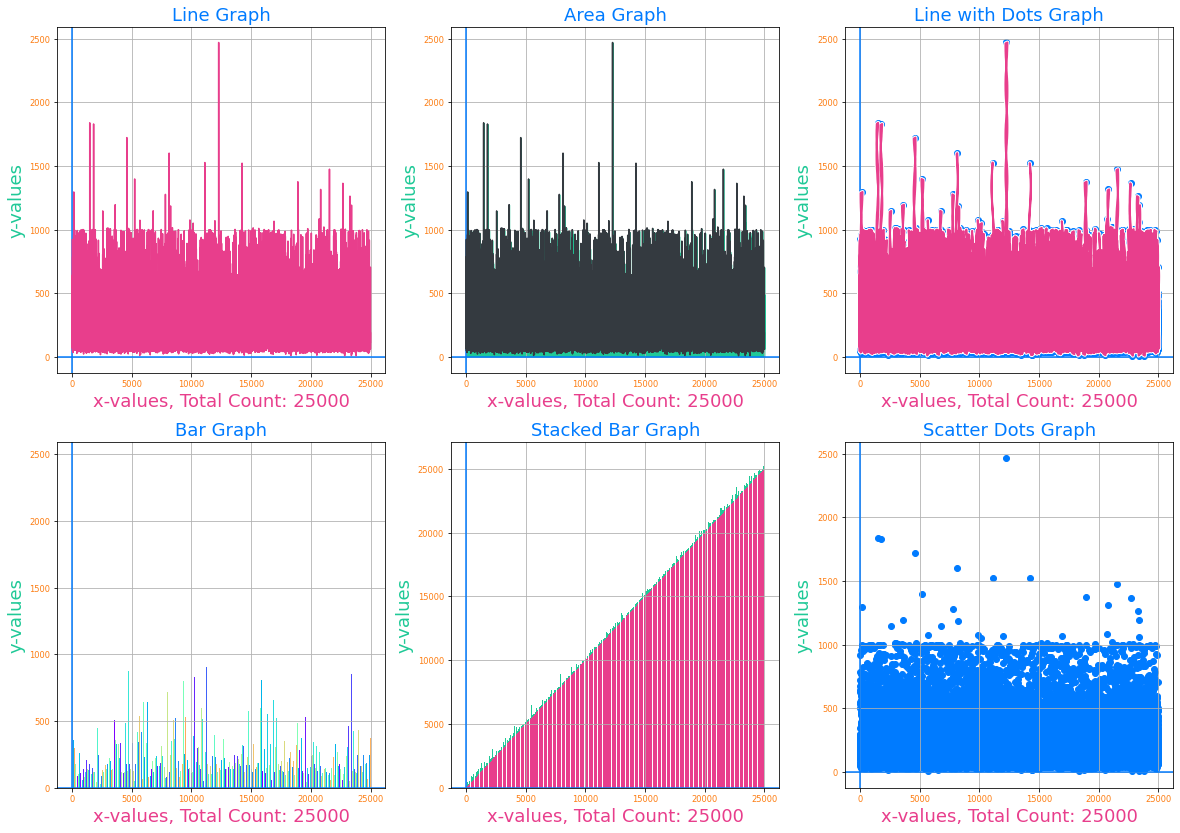

In [ ]:
# see which type of graph suited for our use
row = len(henna.train_wc)
mx_data = numpy.ones((row,2))
mx_data[:,0] = numpy.arange(0,row,1)
mx_data[:,1] = henna.train_wc
monty.draw.graph_visualize(mx_data)

- That was embarrassing. Henna forgets to sort the data. 

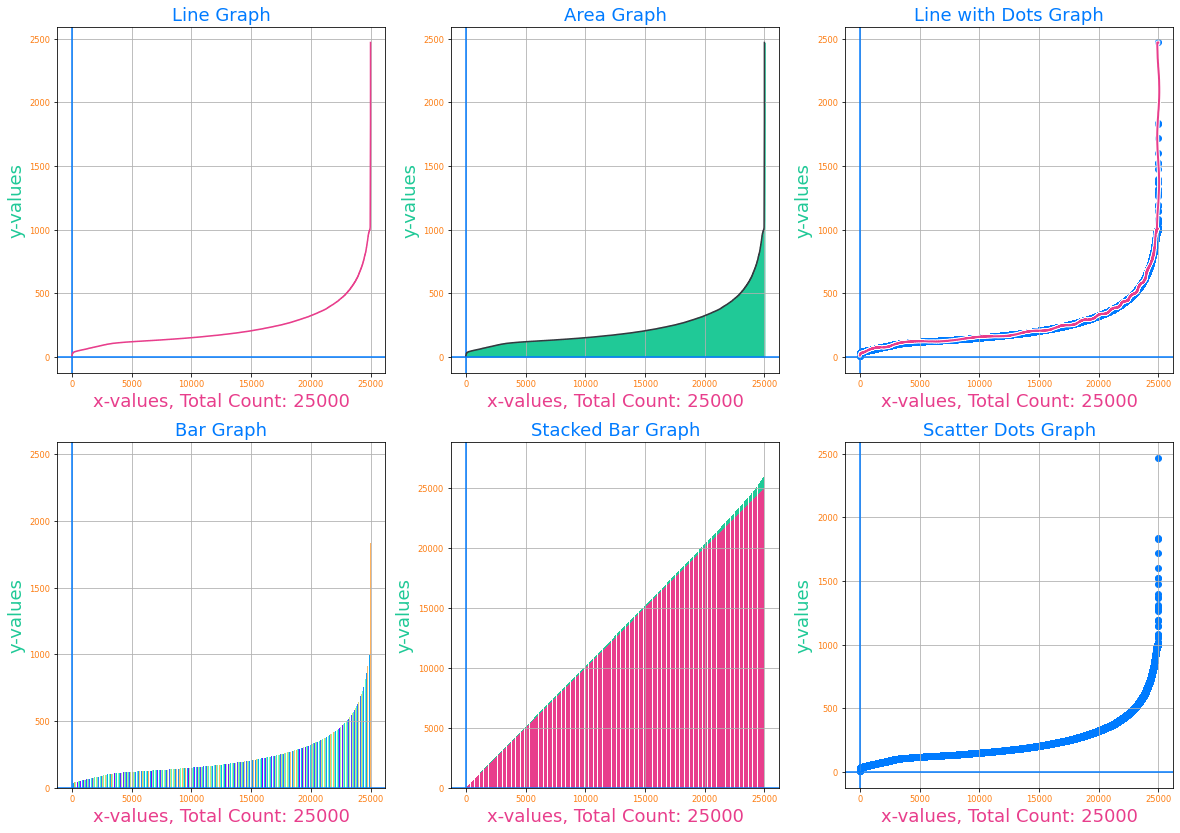

In [ ]:
# sorted and redraw to see which type of graph suited for our use
row = len(henna.train_wc)
mx_data = numpy.ones((row,2))
mx_data[:,0] = numpy.arange(0,row,1)
mx_data[:,1] = henna.train_wc
monty.draw.graph_visualize(mx_data)

- That's better. The "area graph" looks best, so Henna chooses it. We will teach Hanna to combine all three data sets and draw them.

- About a dozen or two dozen movie reviews have more than one thousand words, and there is one movie review with 2,500 words. What are they thinking? Are they writing reviews or a movie screenplay?
 

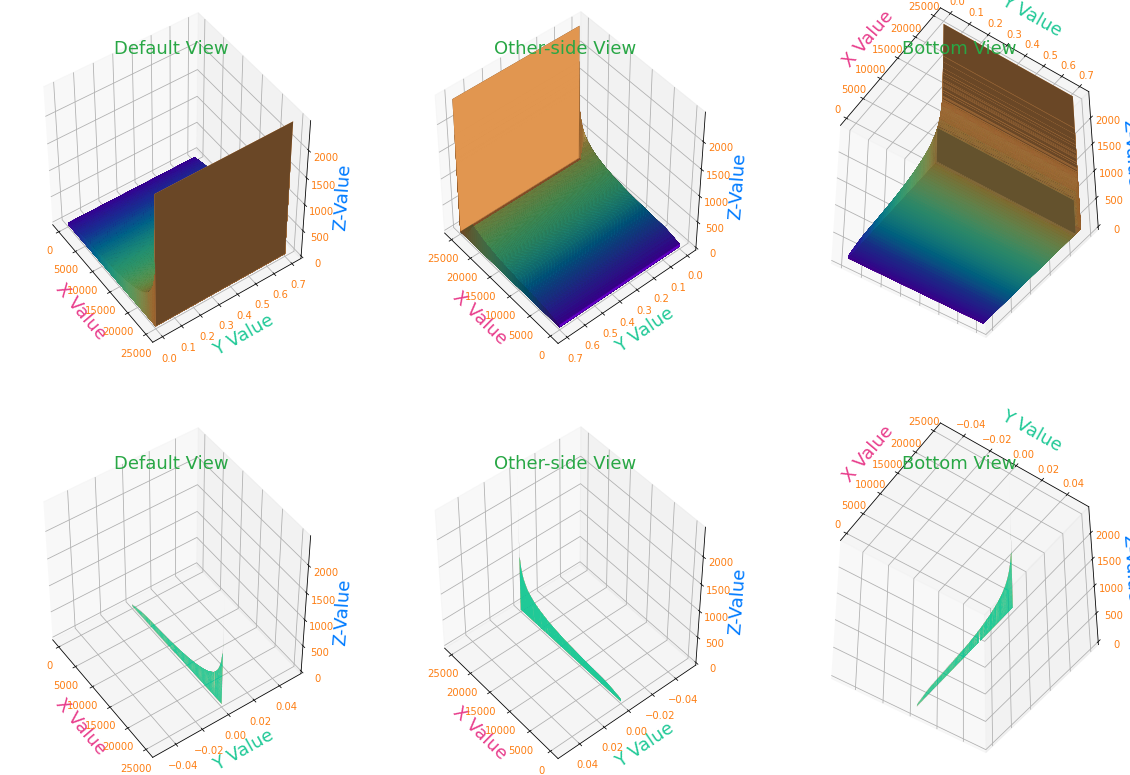

In [ ]:
monty.draw.graph_3d_visualize_bar(mx_data)

- 3D Graphs look nice, but Henna thinks that she doesn't need it yet.


In [ ]:
# grab the word counts for "train", "test" and "unsup" directory
# return an array with wc for each file
@add_method(d3tz)
def _fetch_word_count_mean(self):
  wmean = (self.train_wc.mean() + self.test_wc.mean() + self.unsup_wc.mean()) / 3.0
  return wmean
#
#
# draw word count
@add_method(d3tz)
def draw_word_count(self):
  try:
    #set up train set
    row = len(self.train_wc)
    mx_train = numpy.ones((row,2))
    mx_train[:,0] = numpy.arange(0,row,1)
    mx_train[:,1] = self.train_wc
    # set up test set
    mx_test = mx_train.copy()
    mx_test[:,1] = self.test_wc
    # set up unsup, but unsup has more data so we the first 25,000
    a = len(self.unsup_wc)
    mx_unsup = numpy.ones((a,2))
    mx_unsup[:,0] = numpy.arange(0,a,1)
    mx_unsup[:,1] = self.unsup_wc
    # set up average (mean) line
    wmean = self._fetch_word_count_mean()
    mx_mean_line = numpy.zeros((2,2))
    mx_mean_line[0,1] = wmean
    mx_mean_line[1,0] = row
    mx_mean_line[1,1] = wmean
    # save it for later use
    self.mx_wc_mean_line = mx_mean_line
    self.mx_wc_train = mx_train
    self.mx_wc_test = mx_test 
    self.mx_wc_unsup = mx_unsup
    # draw it
    frame, pic = monty.fetch.graph_canvas(row=1,col=3, size=(20,8))
    monty.draw.graph_line(pic[0],mx_train,is_shade_area=True,shade_alpha=0.8,shade_color=monty.bag.color.teal)
    monty.draw.graph_line(pic[0],mx_mean_line)
    #
    monty.draw.graph_line(pic[1],mx_test,is_shade_area=True,shade_alpha=0.8,shade_color=monty.bag.color.yellow)
    monty.draw.graph_line(pic[1],mx_mean_line)
    #
    monty.draw.graph_line(pic[2],mx_unsup,is_shade_area=True,shade_alpha=0.8,shade_color=monty.bag.color.indigo)
    monty.draw.graph_line(pic[2],mx_mean_line)
    #
    x = "File Count"
    y = "Word Count & Average (pink)"
    h = "Train Movie Reviews Word Count"
    monty.draw.graph_label(pic[0],xlabel=x, ylabel=y, head=h)
    monty.draw.graph_label(pic[1],xlabel=x, ylabel=y, head="Test Movie Reviews Word Count")
    monty.draw.graph_label(pic[2],xlabel=x, ylabel=y, head="Unsup Movie Reviews Word Count")
    frame.show()
  except:
    self._pp("**Error, can not draw graph", "Did you create my buddy, Monty?")
  return
#


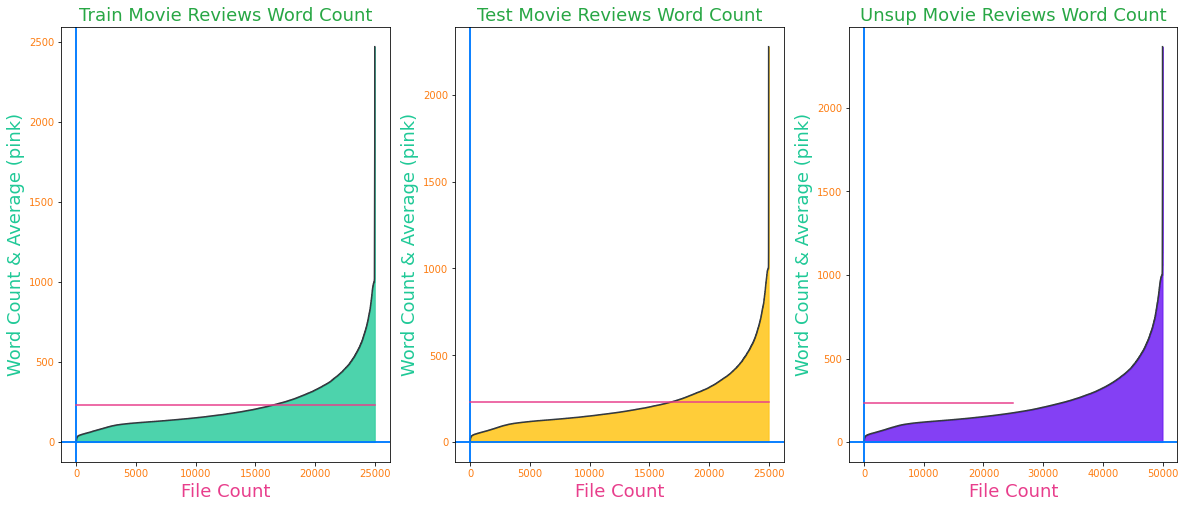

In [ ]:
# do it
henna.draw_word_count()

- What if Henna deletes the tail end of the data? Who would write more than a thousand words movie review?

In [ ]:
# fetch head data, forget the last 50 movies review with the highest word count
@add_method(d3tz)
def _fetch_head_data(self):
  forget_count = -50
  self.train_wc = self.train_wc[:forget_count]
  self.test_wc = self.test_wc[:forget_count]
  self.unsup_wc = self.unsup_wc[:forget_count]
  return

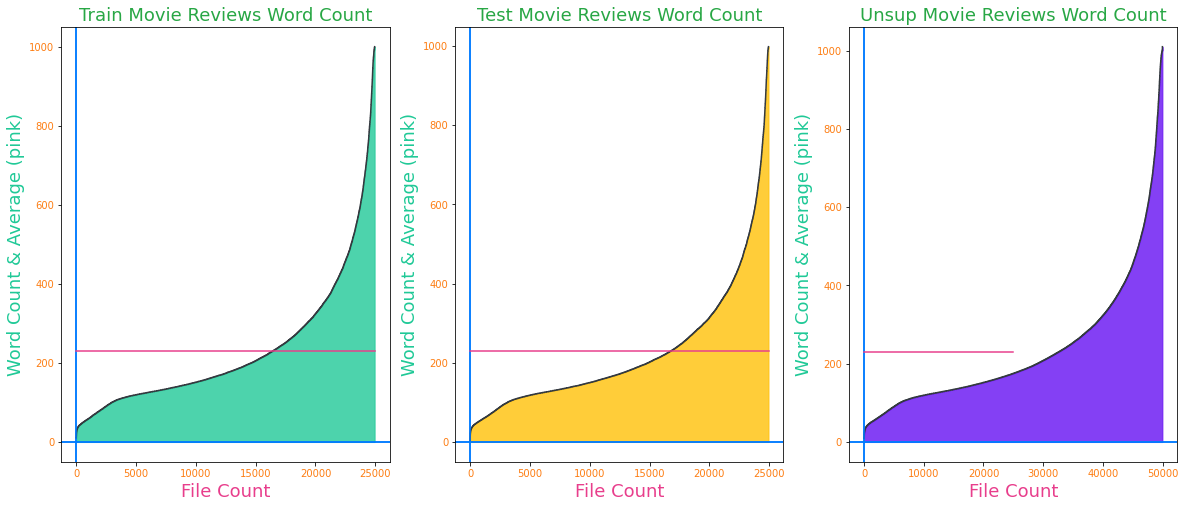

In [ ]:
# do it
henna._fetch_head_data()
henna.draw_word_count()

In [ ]:
@add_method(d3tz)
def _fetch_word_count_std(self):
  self.train_std = self.train_wc.std()
  self.train_mean = self.train_wc.mean()
  self.mx_train_std = scipy.stats.norm.pdf(self.train_wc,self.train_mean,self.train_std)
  #
  self.test_std = self.test_wc.std()
  self.test_mean = self.test_wc.mean()
  self.mx_test_std = scipy.stats.norm.pdf(self.test_wc,self.test_mean,self.test_std)
  #
  self.unsup_std = self.unsup_wc.std()
  self.unsup_mean = self.unsup_wc.mean()
  self.mx_unsup_std = scipy.stats.norm.pdf(self.unsup_wc,self.unsup_mean,self.unsup_std)
  return 
#
#
# draw std
@add_method(d3tz)
def draw_std(self):
  # try:
    #set up train set
    row = round(len(self.train_wc))
    mx_train = numpy.ones((row,2))
    mx_train[:,0] = numpy.arange(0,row,1)
    mx_train[:,1] = self.mx_train_std
    # set up test set
    mx_test = mx_train.copy()
    mx_test[:,1] = self.mx_test_std
    # set up unsup, but unsup has more data so we the first 25,000
    a = round(len(self.unsup_wc))
    mx_unsup = numpy.ones((a,2))
    mx_unsup[:,0] = numpy.arange(0,a,1)
    mx_unsup[:,1] = self.mx_unsup_std
    # aditional setup, conver to the same scale
    afactor = max(self.mx_wc_train[:,1]) / max(mx_train[:,1])
    mx_train[:,1] = mx_train[:,1] * afactor
    afactor = max(self.mx_wc_test[:,1]) / max(mx_test[:,1])
    mx_test[:,1] = mx_test[:,1] * afactor
    afactor = max(self.mx_wc_unsup[:,1]) / max(mx_unsup[:,1])
    mx_unsup[:,1] = mx_unsup[:,1] * afactor
    # draw it
    frame, pic = monty.fetch.graph_canvas(row=1,col=3, size=(20,8))
    monty.draw.graph_line(pic[0],self.mx_wc_train,is_shade_area=True,shade_alpha=0.5,shade_color=monty.bag.color.yellow)
    monty.draw.graph_line(pic[0],self.mx_wc_mean_line)
    monty.draw.graph_line(pic[0],mx_train,is_shade_area=True,shade_alpha=0.5,shade_color=monty.bag.color.teal)
    #
    monty.draw.graph_line(pic[1],mx_test,is_shade_area=True,shade_alpha=0.5,shade_color=monty.bag.color.green)
    monty.draw.graph_line(pic[1],self.mx_wc_test,is_shade_area=True,shade_alpha=0.5,shade_color=monty.bag.color.indigo)
    monty.draw.graph_line(pic[1],self.mx_wc_mean_line)
    #
    monty.draw.graph_line(pic[2],mx_unsup,is_shade_area=True,shade_alpha=0.5,shade_color=monty.bag.color.blue)
    monty.draw.graph_line(pic[2],self.mx_wc_unsup,is_shade_area=True,shade_alpha=0.5,shade_color=monty.bag.color.orange)
    monty.draw.graph_line(pic[2],self.mx_wc_mean_line)
    #
    x = "Movie Review Count "
    y = "Word Count & Mean & STD"
    h = "Train Movie Reviews"
    monty.draw.graph_label(pic[0],xlabel=x, ylabel=y, head=h)
    monty.draw.graph_label(pic[1],xlabel=x, ylabel=y, head="Test Movie Reviews")
    monty.draw.graph_label(pic[2],xlabel=x, ylabel=y, head="Unsup Movie Reviews")
    frame.show()
  # except:
  #   self._pp("**Error, can not draw graph", "Did you create my buddy, Monty?")
    return
#

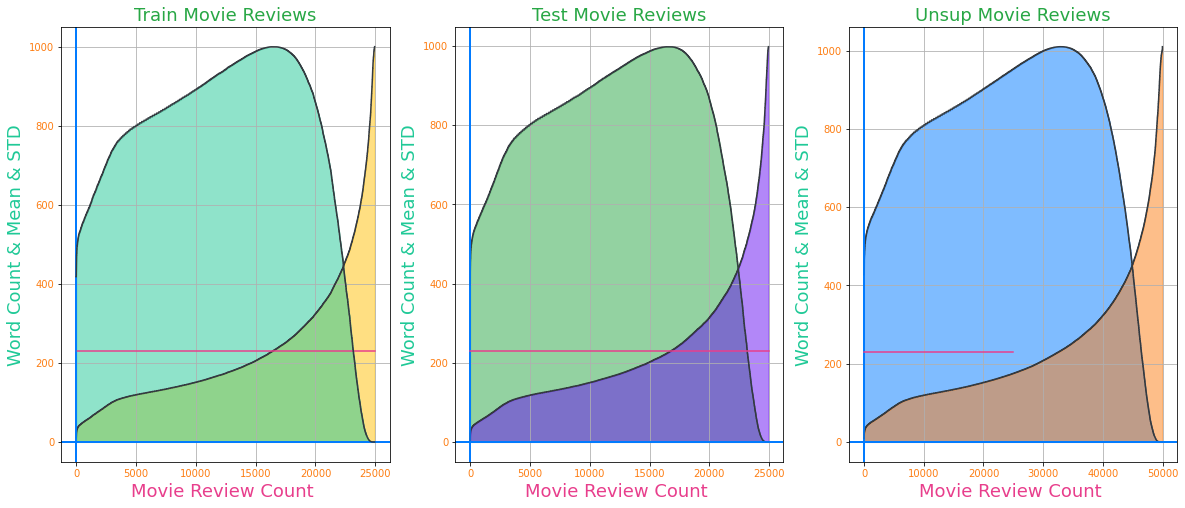

In [ ]:
# do it
henna._fetch_word_count_std()
henna.draw_std()

- The journey already bears some fruit. Henna found that the average movie review is about 231 words. Along with 50,000 labeled files, there are sufficient writing to identify the movie review sentiment as "positive or negative."

- The distribution between the "train" and "test (valid)" data sets are perfect.

- The resulting NLP sentiment model's accuracy should be able to achieve high value.

- The movie reviews are sufficiently wordy for Henna's off-book idea of training the NLP to rate a review from one to five stars. Henna was afraid that most movie reviews are around ten words.

- The data distribution for word count is identical between the three data sets. That is good because the data don't have one set with all the long movie reviews and other sets with short movie reviews. In other words, whether the users like or dislike a movie, they write the same short or lengthy review.

- The standard deviation graph, also known as the humpback of Notre-Dam, for the three data sets is identical.

- Henna found a few gold nuggets and that even before we read the movie review, so let's dive headlong to it.

- If you are keeping score, an original idea = 1,000 gold coins, a gold nugget = 10 gold coins, and memorizing "rectified linear unit activation" or "discriminative learning rate percentage" = one gold coin each.

- Even though Henna is not relying on the given vocab-file or the feat-files, she will take a quick peek at them.

- First, Henna will write a function that randomly prints out "positive, negative, and unsupervised" movie reviews, and she will run it a dozen times. 

## 2.4 Read The Input-data

In [ ]:
@add_method(d3tz)
def print_givin_vocab(self):
  f  = pathlib.Path("data/imdb/imdb.vocab")
  monty.print.text_file(f)
  f = pathlib.Path("data/imdb/train/labeledBow.feat") 
  monty.print.text_file(f,max_line_display=2)
  f = pathlib.Path("data/imdb/test/labeledBow.feat") 
  monty.print.text_file(f,max_line_display=2)
  return

In [ ]:
# do it
henna.print_givin_vocab()

---------------------------------------- : ----------------------------------------
                               File name : data/imdb/imdb.vocab
                        Display max line : 12
the
and
a
of
to
is
it
in
i
this
that
was
---------------------------------------- : ----------------------------------------
                              Line total : 89527
---------------------------------------- : ----------------------------------------
---------------------------------------- : ----------------------------------------
                               File name : data/imdb/train/labeledBow.feat
                        Display max line : 2
9 0:9 1:1 2:4 3:4 4:6 5:4 6:2 7:2 8:4 10:4 12:2 26:1 27:1 28:1 29:2 32:1 41:1
45:1 47:1 50:1 54:2 57:1 59:1 63:2 64:1 66:1 68:2 70:1 72:1 78:1 100:1 106:1
116:1 122:1 125:1 136:1 140:1 142:1 150:1 167:1 183:1 201:1 207:1 208:1 213:1
217:1 230:1 255:1 321:5 343:1 357:1 370:1 390:2 468:1 514:1 571:1 619:1 671:1
766:1 877:1 1057:1 1179:1 1192:1 

- Henna found one more gold nugget. There is a total of 89,527 words in the vocabulary. 

In [ ]:
# get the files
@add_method(d3tz)
def _fetch_files(self):
  self.train_files = monty.fetch.file_name(pathlib.Path("data/imdb/train/pos"))
  self.train_files = numpy.append(self.train_files,monty.fetch.file_name(pathlib.Path("data/imdb/train/neg")))
  self.test_files = monty.fetch.file_name(pathlib.Path("data/imdb/test/pos"))
  self.test_files = numpy.append(self.test_files,monty.fetch.file_name(pathlib.Path("data/imdb/test/neg")))
  self.unsup_files = monty.fetch.file_name(pathlib.Path("data/imdb/unsup"))
  return
#
#
# get random sample movie reviews
@add_method(d3tz)
def print_random_sample(self):
  i = numpy.random.randint(0,len(self.train_files))
  monty.print.text_file(self.train_files[i])
  i = numpy.random.randint(0,len(self.test_files))
  monty.print.text_file(self.test_files[i])
  i = numpy.random.randint(0,len(self.unsup_files))
  monty.print.text_file(self.unsup_files[i])
  return


In [ ]:
# set up, do it once
henna._fetch_files()

In [ ]:
# repeat runing this cell
henna.print_random_sample()

---------------------------------------- : ----------------------------------------
                               File name : data/imdb/train/neg/11140_1.txt
                        Display max line : 12
I thought I was going to watch a scary movie.. and ended up laughing all the way
throughout the movie. In the scene where the human transformed to a werewolf I
thought they was kidding. Todays computer games have ten times better
animations. Low budget, is a fitting comment. I would recommend Wolf (1994) with
Jack Nicholson for a good werewolf movie. It has good special effects as they
should be (human transforming to werewolf). Unless you wish to have good laugh I
would not recommend you to watch this movie. This movie is a joke.
---------------------------------------- : ----------------------------------------
                              Line total : 1
---------------------------------------- : ----------------------------------------
---------------------------------------- : --

- After running the "print_random_sample" code-cell for more than a dozen times, Henna finds the following.

1. There are HTML-tags, such as "\<br\>" that we should delete them, and we will delete the unprintable characters.

2. The movie reviews are one line regardless of length, but that is OK because the goal is to identify "positive or negative" sentiment. Therefore, new-line or carriage-return characters is just another token.

3. The movie names, actors, actresses, and directors (U-Name) are prevalent in the movie reviews, but that should not affects the NLP from predicting the "positive or negative" sentiment of new movies. When U-Name, such as "Robin William" or "Intruder In the Dust," uses to express an opinion, it can be anybody or any movie title.

4. The above insight is a significant find; it's a big gold nugget. It implies Henna doesn't need to retrain the NLP model with recent reviews of new movies. The NLP model should generalize and predict the "positive or negative" sentiment of recent release movies correctly.

5. The first intentional bias that Henna found is the writing is "clean." It means there is no vulgar or sexiest language. What if the users write dirty movie reviews full of censored language? Is the use of censored words convey negative sentiment?

6. The other intentional bias could be in the language pattern, either culturally, economically, generationally, or mannerisms. For example, would a Southerner writes differently from a New Yorker, or would Gen-Z writes differently from Millennials?

7. It would be great to consult with a linguist. If the goal for the NLP model to use nationally, then it would matter. If the goal is to win a competition, then it would not. However, if the project is about rating the blogs for Democrat, Republican, Libertarian, or Conservative, then a linguist should be on the team.

8. It is noteworthy to mention how well the IMDB movie reviews team gathers, arranges, and distributes the data. There are so many things that could go wrong.

9. It's time to tokenize and prepare the two sets of data-bunch for the two NLP training session.



## 2.5 Clean The Input-data

- Before coding and tokenizing the data-bunch, Henna will clean up the data.

1. Move all unnecessary files and directories into a “scratch” directory. In other words, keep only the “*.txt” files.

2. Remove all HTML-tags or unprintable characters from the movie reviews.

3. Remove any movie reviews that have more than 1,100 words. It could be contentious, but from the graphs, there are about 50 reviews in each category that were too long, and we have 25,000 files in the “train” and “test” directories and 50,000 in the “unsup” directory. Furthermore, the average word count is 236, so chop away.

- Normally, Henna uses the 80-20 rules, i.e., 80% of data for training and 20% for validation. We have 50% of data for the “test,” and that is too much. Henna would like to split 75-15-10, i.e., 75% for train-set, 15% for validation-set, and 10% for test-set. There is a total of 50,000 labeled movie reviews.

- Before you cry foul, you are not allowed to change the “test” set in a competition, so by doing this, the competition might disqualify Henna, but who could be mean to a happy, tail-waggy dog. You can’t say “no” to Henna.

- The D3tz journey is about demystifying NLP data and not so much about Kaggle's competition. Therefore, we will follow Henna’s 75-15-10 suggestion. 

- It is a logical split, and it does not violate the rule. The train-set has a separate validation-set, and the test-set is unused in the training session.


In [ ]:
# clean files
@add_method(d3tz)
def clean_files(self):
  # creat scratch dir
  self.scratch_dir = pathlib.Path("data/scratch")
  if os.path.isdir(self.scratch_dir) == False:
    os.mkdir(self.scratch_dir)
  # move the tmp dir
  src = pathlib.Path("data/imdb/tmp_lm")
  dst = pathlib.Path(self.scratch_dir, "/tmp_lm")
  os.rename(src,dst)
  src = pathlib.Path("data/imdb/tmp_clas")
  dst = pathlib.Path(self.scratch_dir, "/tmp_clas")
  os.rename(src,dst)
  # ask Monty to move non-*.txt files to scratch
  src = pathlib.Path("data/imdb")
  dst = self.scratch_dir
  monty.clean.unwanted_files(src, ".txt", scratch_dir=dst, is_inversed=True)
  # ask Monty to clean html-tag
  monty.clean.html_tags_all(src)
  return

In [ ]:
henna._ph()
henna._pp("Clean files", "Remove non-text files, remove HTML-tag and non-printable char.")
henna.clean_files()

---------------------------------------- : ----------------------------------------
                             Clean files : Remove non-text files, remove HTML-tag and non-printable char.
---------------------------------------- : ----------------------------------------
                       Total files count : 5
---------------------------------------- : ----------------------------------------
---------------------------------------- : ----------------------------------------
                       Total files count : 100000
---------------------------------------- : ----------------------------------------


In [ ]:
# clean long files
@add_method(d3tz)
def clean_long_files(self,max_wc=1100):
  src = pathlib.Path("data/imdb")
  i = 0
  for root, dirs, files in os.walk(src):  # @UnusedVariable
    for name in files:
      a = pathlib.Path(root, name)
      wc = self._fetch_words_in_file(a)
      if (wc > max_wc):
        dst = pathlib.Path(self.scratch_dir, name)
        os.rename(a,dst)
        i = i + 1
  self._ph()
  self._pp("Clean files", "Remove movie reviews longer than 1,100 word count.")
  self._pp("Total delete file count", i)
  self._ph()
  return

In [ ]:
# do it
henna.clean_long_files()

---------------------------------------- : ----------------------------------------
                             Clean files : Remove movie reviews longer than 1,100 word count.
                 Total delete file count : 56
---------------------------------------- : ----------------------------------------


In [ ]:
# clean 75-15-10
@add_method(d3tz)
def clean_75_15_10(self):
  # set up creat scratch dir
  self.valid_dir = pathlib.Path("data/imdb/valid")
  if os.path.isdir(self.valid_dir) == False:
    os.mkdir(self.valid_dir)
    pos = self.valid_dir.joinpath("pos")
    os.mkdir(pos)
    neg = self.valid_dir.joinpath("neg")
    os.mkdir(neg)
  self.train_dir = pathlib.Path("data/imdb/train")
  self.test_dir = pathlib.Path("data/imdb/test")
  # ask Monty to do the heavy lifting
  # valid 15% total or 30% files in "test" dir
  monty.clean.split_files_by_perc(self.test_dir.joinpath("pos"),pos, perc=0.30)
  monty.clean.split_files_by_perc(self.test_dir.joinpath("neg"),neg, perc=0.30)
  # test is 10% total or 20% files in "test" dir. 
  # quick math show that we need to move the remaining in "test" by 0.7143 to train
  monty.clean.split_files_by_perc(self.test_dir.joinpath("pos"), self.train_dir.joinpath("pos"), perc=0.7143, head="t")
  monty.clean.split_files_by_perc(self.test_dir.joinpath("neg"), self.train_dir.joinpath("neg"), perc=0.7143, head="t")
  return

In [ ]:
henna._ph()
henna._pp("Clean files", "The 75-15-10 ratio")
henna.clean_75_15_10()

---------------------------------------- : ----------------------------------------
                             Clean files : The 75-15-10 ratio
---------------------------------------- : ----------------------------------------
                       Total files count : 12493
                 Total files moved count : 3748
                           Percent given : 0.3
                                  Source : data/imdb/test/pos
                             Destination : data/imdb/valid/pos
---------------------------------------- : ----------------------------------------
---------------------------------------- : ----------------------------------------
                       Total files count : 12499
                 Total files moved count : 3750
                           Percent given : 0.3
                                  Source : data/imdb/test/neg
                             Destination : data/imdb/valid/neg
---------------------------------------- : ---------------------

In [ ]:
# double checked
monty.print.dir_tree("data", max_file_display=2)

---------------------------------------- : ----------------------------------------
                        Source directory : data
          Display max file per directory : 2
data/
    scratch/
        10044_9.txt
        10311_9.txt
        total files: 60
    imdb/
        valid/
            pos/
                0_10.txt
                10002_8.txt
                total files: 3748
            neg/
                10004_2.txt
                10006_2.txt
                total files: 3750
        test/
            pos/
                10003_8.txt
                10008_8.txt
                total files: 2498
            neg/
                10007_4.txt
                10013_4.txt
                total files: 2500
        unsup/
            0_0.txt
            10000_0.txt
            total files: 49972
        train/
            pos/
                0_9.txt
                10000_8.txt
                total files: 18734
            neg/
                0_3.txt
                10000_4.tx

- Henna loves to draw, so humors her and asks her to draw a few bar charts.

In [ ]:
# count files
@add_method(d3tz)
def _fetch_count_files(self, src_dir):
  i = 0
  for root, dirs, files in os.walk(src_dir):  # @UnusedVariable
      for name in files:
        i += 1
  return i
#
#
# draw the train, test, valid data set
@add_method(d3tz)
def draw_data_set(self):
  # set up
  mx_data = numpy.ones((3,2))
  mx_data[:,0] = numpy.arange(1,4)
  mx_data[0,1] = self._fetch_count_files(self.train_dir)
  mx_data[1,1] = self._fetch_count_files(self.valid_dir)
  mx_data[2,1] = self._fetch_count_files(self.test_dir)
  # draw bar chart
  frame, pic = monty.fetch.graph_canvas()
  monty.draw.graph_bar(pic,mx_data, is_hand=True,color=monty.bag.color.pink)
  monty.draw.graph_label(pic,xlabel="Train, Validate, and Test Data Set", ylabel="Word Count", head="The 75-15-10 Split")
  frame.show()
  return

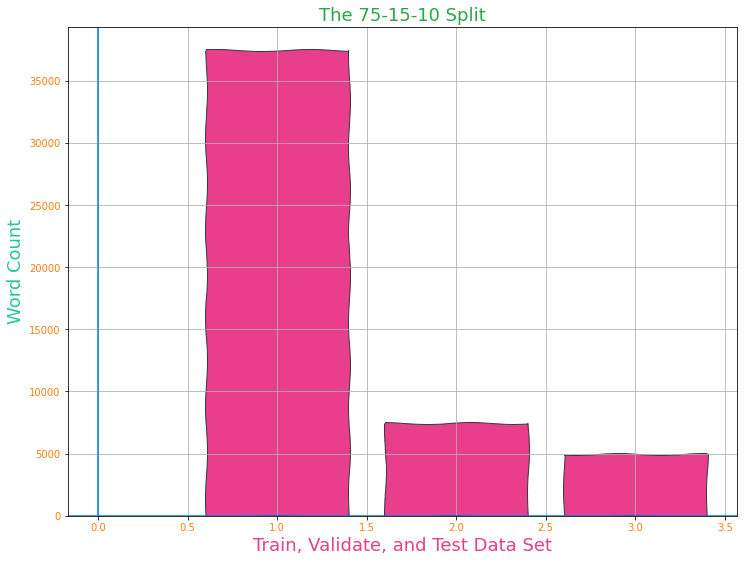

In [ ]:
# Henna, draw away
henna.draw_data_set()

## 2.6 The Fast.ai Standard Six Steps for Creating the "Next Word Prediction" Data-bunch

- The hand-drawn “75-15-10 split” bar chart is beautiful. 

- Moving ahead, Henna creates the data-bunch for "next word prediction" and "sentiment prediction."

- The process is that Henna does one-step and inspects it. The process is the same for NLP as for image classification. The six-steps are as follows.

1. Read (or input) the data and inspect it.

2. Split the “train” and “valid” set and inspect it.

3. Label the data and inspect it. For NLP, this step includes the tokenizer.

4. Add data augmentation and inspect it. Henna will skip this step for NLP.

5. Fetch the batch-size, the data-bunch, and inspect it.

6. Normalize the input-data for the selected base-architecture. Henna will skip this step for NLP.

  - Henna relies on Fast.ai library and Monty to do the heavy lifting. If we dive deep into writing the code from scratch, it will distract from the “d3tz” journey. Moreover, Fast.ai libraries are the best artificial neural network (ANN) libraries. It is far superior to Tensor or Keras.

  - Incidentally, Henna stumbled on a salient factor for using the Jupyter notebook. If you disagree, you can “hack it.”

  - If you think Tensor or any other ANN libraries are better, then you must hack this notebook. Henna and I welcome and encourage you to hack the notebook.

  - **If you can’t hack-it, you won’t make-it. :-)**

### 2.6.1 Read (or input) the data and inspect it.

In [ ]:
import fastai
import fastai.text
#
@add_method(d3tz)
def fetch_1of6_read_data(self):
  self.data_path = pathlib.Path("data/imdb")
  self._nlp_1of6 = fastai.text.TextList.from_folder(self.data_path)
  monty.print.inspect_fastai_textlist(self._nlp_1of6)
  return

In [ ]:
# do it
henna.fetch_1of6_read_data()

---------------------------------------- : ----------------------------------------
                                    Type : <class 'fastai.text.data.TextList'>
                              Total item : 99944
                           The data path : data/imdb
                   First 2 item filename : [PosixPath('data/imdb/valid/pos/10199_10.txt') PosixPath('data/imdb/valid/pos/5898_9.txt')]
---------------------------------------- : ----------------------------------------
                        Output text file : data/imdb/train/pos/893_8.txt
---------------------------------------- : ----------------------------------------
                               File name : data/imdb/train/pos/893_8.txt
                        Display max line : 12
Sammo Hung's 1989 film Pedicab Driver is considered by many to be his
masterpiece. I have to agree to some extent as the film in its greatest parts
really gets as incredible and fantastic as any Hong Kong film ever has. It is a
combination 

- That looks too easy. The folks from Fast.ai deserve big applause to “make AI cool again.”

- Henna read in almost one hundred thousand movie reviews, 99,944, which is correct because she decided to delete the "too long" reviews. Also, the movie reviews are clear of HTML-tag and non-printing characters.  

### 2.6.2 Split the “train” and “valid” set and inspect it.

In [ ]:
# split 85/15
@add_method(d3tz)
def fetch_2of6_split_data(self):
  self._nlp_2of6 = self._nlp_1of6.split_by_rand_pct(0.15)
  monty.print.inspect_fastai_itemlists(self._nlp_2of6)
  return

In [ ]:
# do it
henna.fetch_2of6_split_data()

---------------------------------------- : ----------------------------------------
                                    Type : <class 'fastai.data_block.ItemLists'>
                        Train item count : 84953
                   First two train items : [PosixPath('data/imdb/valid/pos/10199_10.txt') PosixPath('data/imdb/valid/pos/5898_9.txt')]
                        Valid item count : 14991
                   First two valid items : [PosixPath('data/imdb/unsup/3996_0.txt') PosixPath('data/imdb/unsup/41105_0.txt')]
---------------------------------------- : ----------------------------------------


- So why does Henna NOT splits by the “train” and “valid” directories? It is because during the first training session, she is trying to predict the next word, and she uses the “unsupervised” data set. In the second data-bunch, Henna will split by the “train” and “valid” directories.

- Once again, the code looks too easy. It is because the Fast.ai libraries do extensive work under the hood.


### 2.6.3 Label and tokenize the data and inspect it.

In [ ]:
# label for language model
@add_method(d3tz)
def fetch_3of6_label_data(self):
  self._nlp_3of6 = self._nlp_2of6.label_for_lm()
  monty.print.inspect_fastai_labellists(self._nlp_3of6 )
  return


In [ ]:
# do it
henna.fetch_3of6_label_data()

---------------------------------------- : ----------------------------------------
                                 Section : #1
                                    Type : <class 'type'>
                        Train item count : 84953
                   Train first two items : [array([    2,     6, 41038,    15, ...,     6, 38796,    44,    44])
 array([   2,    5,   20,    5, ...,   13, 5666,  862,   10])]
                           *Train Labels : NO labels. Not an image classification model.
                   *Image size and shape : NOT available
                       Valid items count : 14991
                            *Valid Label : NO labels. Not an image classification model.
                   Valid first two items : [array([  2,   5,   9, 335, ..., 124,   5,   0,  10]) array([  2,   5, 126,  13, ..., 729,   5,   0,  10])]
                  Valid first two labels : [0 0]
                Train transform() method : None
               Train transform arguments : {}
         

- Henna gives too much information to digest, so she will take it one at a time.

1. In the output "Section #1" above, the 75-15 split between “train” (84,953 files) and “valid” (14,991 files) is good.

2. In "Section #2", the movie reviews are converted to tokens.

3. At first glance, the first 20 tokens of a file are correct.

4. In "Section #3", the total tokens count is 163,207. That is too many tokens because, from the IMDB vocab file, there should be 89,527 tokens. It is almost twice as many tokens. What’s going on?

5. Henna shows the first 20 tokens. The “xx-” tokens are special tokens.

6. In "Section #4", Henna shows the last 20 tokens, which marked as “zero” or “xxunk” mean unknown. There are misspelled words or make-up words, but we have to dive deep into the unused words.

7. In "Section #5 and #6", Fast.ai default to 60,000 tokens. That means the system discards 103,207 words, which is throw out 63% of the text in the movie reviews. It’s not good. Henna should rework our data or deep dive into the Fast.ai library to fix it.

8. There is no easy way to do this or any fancy graphs that would shorten the time. Henna has to dig deep. It is good that Henna is a dog and not a cat. :-)

### 2.6.3B -- Dig Deep in Tokenizer

In [ ]:
import textwrap
# print out random 200 unused words, max_limit (60,000) is from fast.ai
@add_method(d3tz)
def print_random_unused_words(self, wc=200, max_limit=60000, is_reversed=False):
  k = list(self._nlp_3of6.vocab.stoi.keys())
  v = list(self._nlp_3of6.vocab.stoi.values())
  max = len(k)
  self._ph()
  if is_reversed:
    i = numpy.random.randint(1, high=(max_limit-wc))
    self._pp("Random Good Words, Tokens, count", wc)
  else:
    i = numpy.random.randint(max_limit, high=(max-wc))
    self._pp("Random Unknown, Unused Words, count", wc)
  self._pp("Index", i)
  j = i + wc
  self._ph()
  words = str(k[i:j])
  print(textwrap.fill(words,width=80))
  self._ph()
  return

In [ ]:
#print random unknown, unused words, run it a dozen of time or more.
henna.print_random_unused_words()

---------------------------------------- : ----------------------------------------
     Random Unknown, Unused Words, count : 200
                                   Index : 145001
---------------------------------------- : ----------------------------------------
['godparents', 'likings', 'sicence', 'fanatasy', 'f___-ed', 'unbearded', "--
don't", 'trandgender', 'alow', 'gawfs', 'raliegh', '.ok', 'bodybag', 'farino',
'uncronological', 'spoilers**khamosh', 'jook', 'plot.etc', 'lbp', 'abysymal',
'spraypainted', 'squirtguns', 'doorknobs', 'get.the', 'sabra', 'society.just',
'cappucino', 'phriends', 'week.and', 'bollixed', 'showstopping', 'misdrawing',
'comedus', 'reliefus', 'feder', 'carabiners', 'climby', 'elmann', 'chematodes',
'ellman', 'feibleman', 'subgenera', 'consilation', 'features.but', 'vercors',
'greame', 'tropi', 'vancruysen', 'hominoids', 'zirconia', 'jerilee', 'ides',
'trashmaster', 'grandmammy', 'artists--', 'tt0077713', 'torkle', 'pembrook',
'pantaloons', '204', 'munson', 

In [ ]:
#print random valid token
henna.print_random_unused_words(is_reversed=True)

---------------------------------------- : ----------------------------------------
        Random Good Words, Tokens, count : 200
                                   Index : 19085
---------------------------------------- : ----------------------------------------
['potts', 'steeped', 'rehearsals', 'maori', 'fickle', 'bologna', 'bassett',
'queasy', 'stressful', 'courier', 'bureaucracy', 'successive', 'finances',
'g.i.', 'plod', 'banzai', 'inexpensive', 'trancers', 'delved', 'imported',
'heathers', 'silvers', 'marbles', 'unceremoniously', 'irvin', 'petersen',
'nominees', 'coincidental', 'prudish', 'girlie', 'sculptor', 'milano', 'bakula',
'engineers', 'assertion', 'implants', 'aimee', 'enact', 'attentive', 'exited',
'ungrateful', 'temp', 'gaunt', 'plumbing', 'deterioration', 'surfaces',
'weighed', 'ishtar', 'mayans', 'qt', 'inanimate', 'fudd', 'exclamation',
'makeshift', 'shelved', 'u.', 'eminent', 'tvm', '.well', 'motorcycles',
'suspending', 'rattle', 'reappears', 'foibles', 'fees', 'pl

- After running the “print_random_unused_words” code-cell a dozen times or more, Henna has a few recommendations to improve the tokenizer process.

1. There are many combined words with a “period without space,” such as “somewhat.like,” “like.that,” “floor.what,” “drunk.and,” “score.well.defies,” “as.well.something,” or “convincing.all.”

2. Similar to the above, combined words with a “comma without space” and “dash without space” is the problem.

3. By purposely discarding the misspelled words, the system bias against reviewers who can’t spell. In other words, if the users are lazy and a lousy speller, e.g., write a ten words review with five misspelled words, the NLP model will not be able to predict it correctly.

4. No one worried about biases in a Kaggle competition, but one should speak out about the intentional biases in a real-world project.

5. For example, if the NLP is used to monitor and recommend your newsfeed and advertising-feed and doesn’t correct your spelling, the system will classify you with a false persona.

6. Henna is a dog, but she loved to read science fiction stories. In her story, a government drone using NLP to grant entrance to the castle. It’s a very dull and desolate castle because the drone gave only privileged lawyers and English-major students access. :-)

7. Henna can choose to include misspelled words or make-up words. The NLP model does what she told it to do. In other words, the NLP model can be used to write like a Democrat and not Republican, write like a Nobel laureate, or in the opposite end, write like Batman's Joker. It could be propaganda or fake news, but the salient point is that the decision which words to tokenized or discarded contributes substantially to the NLP model or adversely affects the accuracy with intentional biases.

8. Furthermore, if you read the NLP’s valid words, some spell incorrectly. The algorithm is if the term is used twice and the maximum buffer has not exceeded, then count the word as valid.

9. Henna read the valid token by setting the parameter “is_reversed=True.” There are many misspelled words and make-up words. In other words, if a couple of people write “Kastle instead of Castle” and “Kastle” appear earlier in the tokenizer process, then “Kastle” is valid. There is no grammar checking in the tokenizer.

### 2.6.3C -- Tokinizer Graphs, an Original Thought

- There are too much data to ingest. Henna is a dog. She can’t count past five, and I can’t do much better. Therefore, we draw graphs. 

- There are 100,000 files, and each file has on the average 200 words, so that is 20 million tokens. I have read extensively in NLP books and blogs, and nowhere did I see illustrated graphs for the NLP data set. 

- <h2>Why not?</h2>

- Henna and I are not shy from original thoughts, so we draw graphs after graphs. We used Monty’s ability to draw 2D diagrams and 3D charts, and Henna found what she is hoping to find, an original thought. The below is a cleanup code-cell version. 


In [ ]:
# return, tokens-count, unique token-count, unknown token-count
@add_method(d3tz)
def _fetch_token_info(self, token_arr):
  i = len(token_arr)
  j = len(numpy.unique(token_arr))
  k = i - numpy.count_nonzero(token_arr)
  return i, j, k
#
#
#
@add_method(d3tz)
def fetch_token_graph_data(self):
  # set up
  t = self._nlp_3of6.train.x.items
  self.train_count = len(t)
  self.train_graph_data = numpy.ones((self.train_count,3))
  v = self._nlp_3of6.valid.x.items
  self.valid_count = len(v)
  self.valid_graph_data = numpy.ones((self.valid_count,3))
  for i in range(self.train_count):
    a,b,c = self._fetch_token_info(t[i])
    self.train_graph_data[i,:] = [a, b, c]
  #
  for i in range(self.valid_count):
    a,b,c = self._fetch_token_info(v[i])
    self.valid_graph_data[i,:] = [a, b, c]
  #
  return


In [ ]:
# do it
henna.fetch_token_graph_data()

In [ ]:
# draw the train, test, valid data set
@add_method(d3tz)
def draw_tokenizer(self):
  # set up
  mx_train_token = numpy.ones((self.train_count,2))
  mx_train_unique = numpy.ones((self.train_count,2))
  mx_train_discard = numpy.ones((self.train_count,2))
  #
  mx_train_token[:,0] = numpy.arange(0, self.train_count)
  mx_train_token[:,1] = self.train_graph_data[:,0]
  mx_train_token[:,1].sort()
  #
  mx_train_unique[:,0] = numpy.arange(0, self.train_count)
  mx_train_unique[:,1] = self.train_graph_data[:,1]
  mx_train_unique[:,1].sort()
  #
  mx_train_discard[:,0] = numpy.arange(0, self.train_count)
  mx_train_discard[:,1] = self.train_graph_data[:,2]
  mx_train_discard[:,1].sort()
  #
  #
  mx_valid_token = numpy.ones((self.valid_count,2))
  mx_valid_unique = numpy.ones((self.valid_count,2))
  mx_valid_discard = numpy.ones((self.valid_count,2))
  #
  mx_valid_token[:,0] = numpy.arange(0, self.valid_count)
  mx_valid_token[:,1] = self.valid_graph_data[:,0]
  mx_valid_token[:,1].sort()
  #
  mx_valid_unique[:,0] = numpy.arange(0, self.valid_count)
  mx_valid_unique[:,1] = self.valid_graph_data[:,1]
  mx_valid_unique[:,1].sort()
  #
  mx_valid_discard[:,0] = numpy.arange(0, self.valid_count)
  mx_valid_discard[:,1] = self.valid_graph_data[:,2]
  mx_valid_discard[:,1].sort()
  #
  # draw area/line graph
  frame, pic = monty.fetch.graph_canvas(row=1,col=2,size=(18,9))
  monty.draw.graph_line(pic[0], mx_train_token,is_shade_area=True, shade_alpha=0.5, shade_color=monty.bag.color.teal)
  monty.draw.graph_line(pic[0], mx_train_unique,is_shade_area=True, shade_alpha=0.5, shade_color=monty.bag.color.yellow)
  monty.draw.graph_line(pic[0], mx_train_discard,is_shade_area=True, shade_alpha=0.5, shade_color=monty.bag.color.red)
  #
  monty.draw.graph_line(pic[1], mx_valid_token,is_shade_area=True, shade_alpha=0.5, shade_color=monty.bag.color.teal)
  monty.draw.graph_line(pic[1], mx_valid_unique,is_shade_area=True, shade_alpha=0.5, shade_color=monty.bag.color.yellow)
  monty.draw.graph_line(pic[1], mx_valid_discard,is_shade_area=True, shade_alpha=0.5, shade_color=monty.bag.color.red)
  # label them
  xlab = "Movie Reviews Sorted By Token Count"
  ylab = "Token Count (Teal), Unique (Yellow/Green), Discard (Red)"
  monty.draw.graph_label(pic[0],xlabel=xlab, ylabel=ylab, head="Tokenizer, Training Set")
  monty.draw.graph_label(pic[1],xlabel=xlab, ylabel=ylab, head="Tokenizer, Validation Set")
  frame.show()
  return

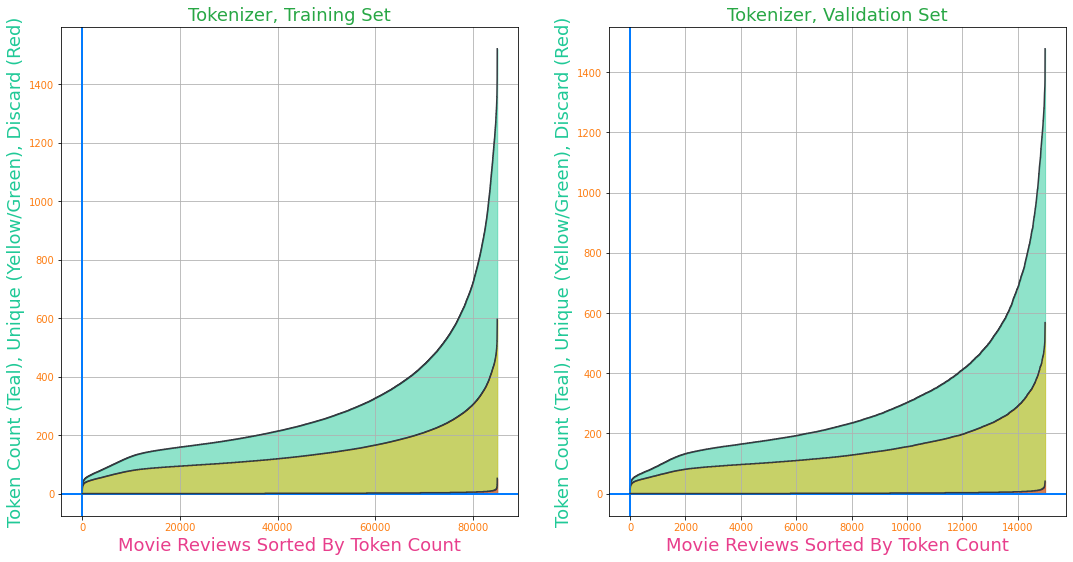

In [ ]:
# do it
henna.draw_tokenizer()

- They are beautiful graphs. With a glance, we verify the tokenizer is working magnificently, and the people at the IMDB curated a perfect set of NLP data. 

- When you are working on your NLP project, the NLP data should look like these two graphs. It’s so well normalized. Henna is ready to re-use this graphing method for all of her NLP projects. 

- Henna was so worried about the “63% discarded tokens,” and the tokens count (163,207) is twice as many as the IMDB’s vocab files (89,527). 

- The graphs show the “discarded token” per file is tiny. It’s barely registered on the chart. Therefore, it does not matter how many total tokens we discarded, as long as the per file per discard token is low. 

- We will ask Henna to graph the average per file count to verify the point above. 

In [ ]:
# draw tokenizer average
@add_method(d3tz)
def draw_tokenizer_average(self):
  # set up
  mx_data = numpy.ones((3,2))
  mx_data[:,0] = numpy.arange(1,4)
  i = (self.train_graph_data[:,0].mean() + self.valid_graph_data[:,0].mean()) / 2
  mx_data[0,1] = i
  #
  j = (self.train_graph_data[:,1].mean() + self.valid_graph_data[:,1].mean()) / 2
  mx_data[1,1] = j
  #
  k = (self.train_graph_data[:,2].mean() + self.valid_graph_data[:,2].mean()) / 2
  mx_data[2,1] = k
  # draw bar chart
  frame, pic = monty.fetch.graph_canvas()
  monty.draw.graph_bar(pic,mx_data, is_hand=True,color=monty.bag.color.orange)
  xlab = "Token (" + str(round(i,2)) + "), Unique (" + str(round(j,2)) + "), Discarded (" + str(round(k,2)) + ")"
  monty.draw.graph_label(pic,xlabel=xlab, ylabel="Token Count", head="Tokenizer, Average Token Per File")
  frame.show()
  return

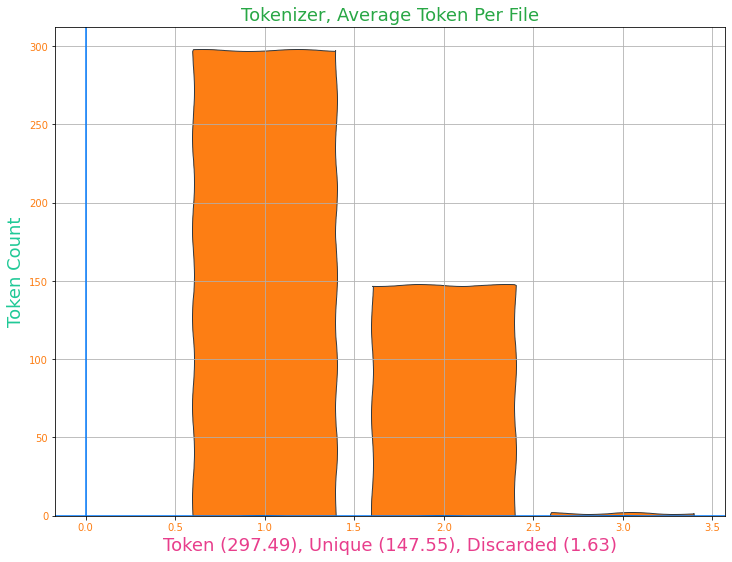

In [ ]:
# do it
henna.draw_tokenizer_average()

- The “Tokenizer Average” graph proves it. The tokenizer is working correctly, and the default 60,000 maximum token buffer is sufficient. 

- Henna doesn't need to increase the maximum token buffer or change the frequency of words from twice to three-time before accepting it as a valid token. 

- On average, for a movie review of 297 words, the system only discarded 1.64 words. That is 0.55% per file. 

- At first look, there are 63% token discarded. Henna thought that the system dropped every other word in a movie review, but the system only dropped one or two words in actuality.

- The “Tokenizer graphs” count as an “original thought.” Therefore, Henna wins 1,000 gold coins. 


><center><h2><i>Henna has an original thought, Yippy!</i></h2></center>

### 2.6.3D -- Normalize Token Words

- Moving forward, we will ask Henna to do the following task.

1. Teach Henna to add spaces before and after “period, comma, and dash.”

1. We could hack the Fast.ai libraries, but that would take a bit longer, and Henna, with her tail wagging, is so eager to help, so Henna, go for it.

3. Re-run the first three steps.

In [ ]:
import re
#
# 
# clean glob words
@add_method(d3tz)
def _clean_glob_line(self, line):
  return re.sub(r'(?<=[.,-])(?=[^\s])', r' ', line)
#
#
# clean glob in file
@add_method(d3tz)
def _clean_glob_file(self, original_file, _clean_function):
  src = "_tmp1__.txt"
  is_ok = True
  with open(original_file) as old, open(src, 'w') as new:
    for line in old:
      a = _clean_function(line)
      new.write(a)
  new.close()
  old.close()
  os.rename(src, original_file)
  return is_ok
#
# -------------------------------------- + ----------------------------------------
#
@add_method(d3tz)
def clean_glob_dir(self, src_dir,_clean_function):
  is_ok = True
  i = 0
  self._ph()
  if (os.path.isdir(src_dir)):
    for root, dirs, files in os.walk(src_dir):  # @UnusedVariable
      for name in files:
        a = pathlib.Path(root, name)
        self._clean_glob_file(a, _clean_function)
        i = i + 1
    self._pp("Total files count", i)
  else:
    self._pp("**Error not a directory", src_dir)
    is_ok = False
  self._ph()
  return is_ok
#


In [ ]:
# do it
henna.clean_glob_dir(pathlib.Path("data/imdb"), henna._clean_glob_line)

---------------------------------------- : ----------------------------------------
                       Total files count : 99944
---------------------------------------- : ----------------------------------------


True

- Henna, good job!

- Re-run the first 3 steps of the data-bunch.

### 2.6.1 (Rerun) Read the data and inspect it.

In [ ]:
# do it
henna.fetch_1of6_read_data()

---------------------------------------- : ----------------------------------------
                                    Type : <class 'fastai.text.data.TextList'>
                              Total item : 99944
                           The data path : data/imdb
                   First 2 item filename : [PosixPath('data/imdb/valid/pos/10199_10.txt') PosixPath('data/imdb/valid/pos/5898_9.txt')]
---------------------------------------- : ----------------------------------------
                        Output text file : data/imdb/unsup/2892_0.txt
---------------------------------------- : ----------------------------------------
                               File name : data/imdb/unsup/2892_0.txt
                        Display max line : 12
In this true coming- of- age story, young Matt is ready to leave his one- horse
town and travel with his best friend Schultz. The only thing keeping him in town
is his father's garage, which isn't doing good business. He doesn't want to
abandon h

- It is the same result as the first time. The good news is that Henna has not broken anything.

### 2.6.2 (Rerun) Split the “train” and “valid” set and inspect it.

In [ ]:
# do it
henna.fetch_2of6_split_data()

---------------------------------------- : ----------------------------------------
                                    Type : <class 'fastai.data_block.ItemLists'>
                        Train item count : 84953
                   First two train items : [PosixPath('data/imdb/valid/pos/10199_10.txt') PosixPath('data/imdb/valid/pos/5898_9.txt')]
                        Valid item count : 14991
                   First two valid items : [PosixPath('data/imdb/train/pos/t2579_9.txt') PosixPath('data/imdb/unsup/30555_0.txt')]
---------------------------------------- : ----------------------------------------


- It is the same result as the first time. Good job, Henna.

### 2.6.3 (Rerun) Label and tokenize the data and inspect it.

In [ ]:
# do it
henna.fetch_3of6_label_data()

---------------------------------------- : ----------------------------------------
                                 Section : #1
                                    Type : <class 'type'>
                        Train item count : 84953
                   Train first two items : [array([    2,     6, 36275,    15, ...,     6, 40055,    43,    43])
 array([   2,    5,   20,    5, ...,   13, 5605,  847,   10])]
                           *Train Labels : NO labels. Not an image classification model.
                   *Image size and shape : NOT available
                       Valid items count : 14991
                            *Valid Label : NO labels. Not an image classification model.
                   Valid first two items : [array([    2,     5,  3664,     5, ...,    26,   730, 13656,    10])
 array([   2,   19,  252, 1463, ...,   14,    9, 2700,   10])]
                  Valid first two labels : [0 0]
                Train transform() method : None
               Train transform

In [ ]:
#print random unknown, unused words, run it a dozen of time or more.
henna.print_random_unused_words()

---------------------------------------- : ----------------------------------------
     Random Unknown, Unused Words, count : 200
                                   Index : 111501
---------------------------------------- : ----------------------------------------
['verdure', 'flashforward', 'literalised', 'cocteauesque', 'eureopean',
'pernie', 'hittin', 'sardinia-', 'replayability', 'surity', 'varite', 'ewtn',
'd&g', 'getters', 'freako', "rp'ing", "larp'd", 'unfamous', 'bolloywood',
'minicab', 'archetypally', 'tlent', 'ward-', '45089191', 'mandarine', 'evilize',
'27yo', 'imraan', 'majnoo', 'shushmita', 'chojar', 'dastor', 'siner', 'angadi',
'pravda', 'stencilled', 'tessone', 'rondelli', 'billingslea', 'lifeform',
'guevarra-', 'neochristian', "willis'character", 'rodreiguez', 'justus',
'dohnanyi', 'preuss', 'kirschbaum', 'posessions', 'feddy', "mean'n'nasty",
'camaso', 'fossati', 'lauri', 'prog-', 'tension*yawn', 'soils',
'eccentricities-', 'dzundza-', 'micki', 'lalaland', 'soapiness',

In [ ]:
#print random unknown, unused words, run it a dozen of time or more.
henna.print_random_unused_words(is_reversed=True)

---------------------------------------- : ----------------------------------------
        Random Good Words, Tokens, count : 200
                                   Index : 47669
---------------------------------------- : ----------------------------------------
['resale', '2:45', '28-', 'constellations', 'allcroft', 'flunks', 'bloomfield',
'hiccup', 'ricans', 'extremely-', 'earthworms', 'dmx', 'burgermeister',
'humanlike', 'nance', 'jailers', 'funari', 'cancelling', 'streiber', 'unicorns',
'vor', 'impudence', 'dreads', 'kinte', 'limburger', 'lemurs', 'farcial',
'horsing', 'tsuruta', 'untainted', 'demoralizing', 'mccalman', 'soisson',
'chainsaw-', 'jw', 'pca', 'solipsistic', 'hardcover', 'gujarat', 'calves',
'station-', 'bayside', 'oda', 'goodnik', 'hauptmann', 'wareing', 'quixotic',
'calories', 'rafts', 'pumpkins', 'winslett', 'magnets', 'adam-', 'margareth',
'underated', 'cometh', 'shortland', 'heatseeker', 'pippa', 'overcast', 'larded',
'moron-', 'mckell', 'commemorating', 'sensuou

- From the above results, in section #3, the total tokens were reduced to 156,091. That is a 7,116 tokens reduction. Good job, Henna!

- In section #4, the total discarded token percentage reduced from 63% to 62%. It’s a small step in the right direction, but as the “Tokenizer” graphs show, the discarded tokens per file are more weighty.


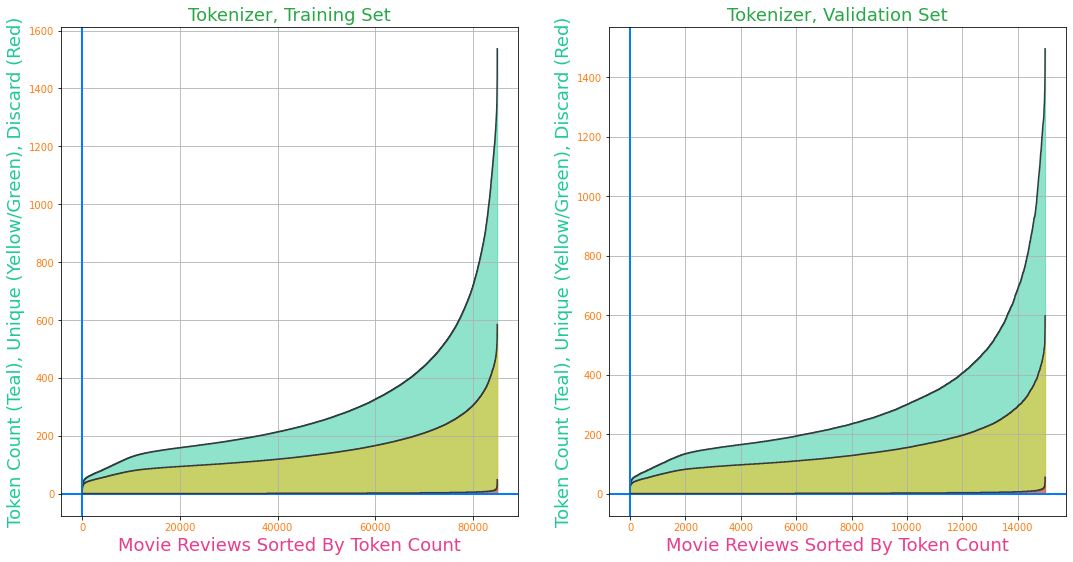

In [ ]:
# do it
henna.fetch_token_graph_data()
henna.draw_tokenizer()

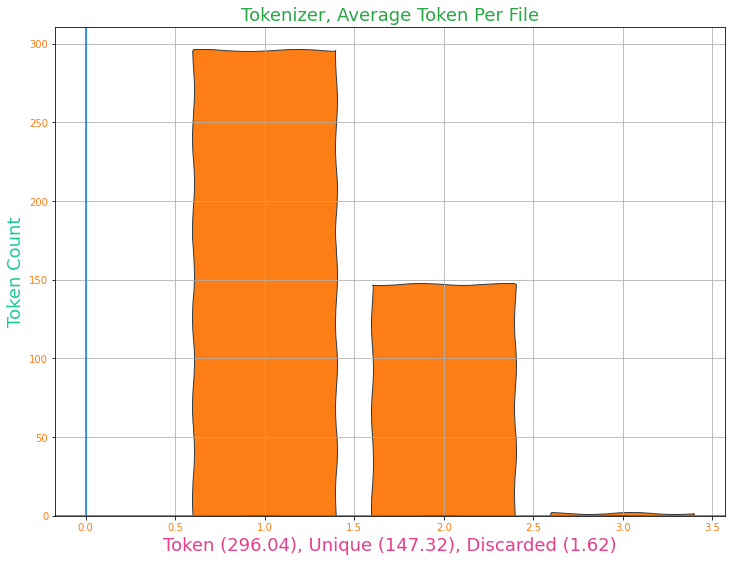

In [ ]:
# do it
henna.draw_tokenizer_average()

- It is amazing that with over 20 million data points, we can verify results with a glance. We didn’t break the tokenizer, and we improved it by the tiniest of margin. The average discard tokens per file are reducing from 1.64 tokens to 1.63 tokens.

### 2.6.4 Add data augmentation and inspect it. 

- With the image classifier or image segmentation ANN model, Henna uses data augmentation with a notable effect. By flipping, skewing, and warping the images, she increases the training data set by a factor of four to twelve. 

- So why can’t Henna augments the writing words? In English, you can’t flip characters or words. Skewing and warping could not apply to words. 

- Henna doesn't know how or read any book or article about word-augmentation. She doesn't even know if it would be possible. She needs to consult a linguist. 

- Even if everyone said, “NO, it can’t be done.” Henna would not stop exploring “why” because it would be hubris to think that “if I can’t do it, no one else can.”

- Henna could smell another adventure for the next “sandbox” project. 

### 2.6.5 Fetch the batch-size, the data-bunch, and inspect it.

- Henna needs a better method of calculating batch-size. For now, Monty based it only on the available free GPU RAM. It should be a straightforward math equation of free GPU RAM, input data size, and the number of layers in the base architecture. 

- Henna did a quick online search, and she did not find any article or blog about a formal batch-size calculation. It would make a fun next “sandbox” project. 



In [ ]:
# GPU and RAM info
monty.print.gpu_info()

---------------------------------------- : ----------------------------------------
                           Total GPU RAM :  15.75 GB
                            Free GPU RAM :  15.74 GB
                            Free CPU RAM :  23.14 GB
            Garbage collection recovered : 9621.00
---------------------------------------- : ----------------------------------------


In [ ]:
# 
# data bunch
@add_method(d3tz)
def fetch_5of6_databunch(self):
  self.batch_size = monty.fetch.batch_size()
  self._nlp_5of6 = self._nlp_3of6.databunch(bs=self.batch_size)
  monty.print.inspect_fastai_data_bunch(self._nlp_5of6)
  return

In [ ]:
# do it
henna.fetch_5of6_databunch()

---------------------------------------- : ----------------------------------------
                      Data Bunch Section : #1
                                    Type : <class 'fastai.text.data.TextLMDataBunch'>
                       Train items count : 84953
 Train items target-transform pixel size : {}
                            *Train Image : NOT an image data-bunch
                *Train classes or Labels : NO classes. It could be Regression model.
---------------------------------------- : ----------------------------------------
                      Data Bunch Section : #2
                       Valid items count : 14991
 Valid items target-transform pixel size : {}
                            *Valid Image : NOT an image data-bunch
                *Valid classes or Labels : NO classes. It could be Regression model.
---------------------------------------- : ----------------------------------------
                      Data Bunch Section : #3
                        Train 

- Once again, the Fast.ai library does all the work. Inspecting the data-bunch, section #1 shows that the train data-set is correct. Section #2 shows the valid data-set is accurate, and section #3 shows the batch-size is 48, and we are using the GPU-Cuda interface. 

- Section #4 shows the tokenizer is working reliably.

- To double-checking the data-bunch, we use Fast.ai’s show_batch() method. 

In [ ]:
henna._nlp_5of6.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


idx,text
0,"artists , newspaper men and film makers into their xxmaj nazi xxup hq in order that the may be informed of just what the newly declared "" xxmaj third xxmaj reich "" ( aka ' xxmaj empire ' ) expected of them . xxup when the xxmaj master xxmaj director from the xxmaj german xxmaj cinema 's xxmaj silent xxmaj impressionist and xxmaj expressionist era , xxmaj mr. xxmaj fritz"
1,"movie . xxmaj my mother died of bone cancer , so it really hits home with me . xxmaj maybe this is why i love it so much . i like the relationships between the children and their parents , and the relationship of brother and sister , but especially love the relationship between husband and wife . xxmaj to me it is truly beautiful . i highly recommend this"
2,"xxmaj this one is better than most , which is to say mediocre . xxmaj it has many of the usual flaws of xxmaj canadian films . self- conscious acting . an excess of cinematic gimmicks and , above all , the self- effacing xxmaj canadian habit of using xxmaj canadian cities as stand- ins for xxmaj american ones . i mean using the historic metropolis of xxmaj montreal as"
3,xxmaj bronson and xxmaj ireland that are actually very funny . xxmaj what really gets me is how this film was promoted upon its release and how it 's still made to look as a xxup dvd . xxmaj the original trailer gives you the feeling that ' xxmaj assassination ' is another cold- hearted xxmaj bronson shoot- ' em- up . xxmaj but a lot of this movie -
4,""" at it . xxmaj the story jumps around a bit and can be confusing , but it also makes you stay focused on what s going on until the end when everything comes together as the puzzle falls into place . xxmaj the supporting actors did a good job of helping to carry the movie . i found the movie to be powerful and thought provoking . xxbos i"


### 2.6.6 Normalize the input-data for the selected base-architecture.

- Similar to the “data augmentation” discussion, Henna routinely tag on the normalization function to the data-bunch. For an image classifier project that uses the “resnet-34 or resnet-50” base architecture, she uses the “imagenet_stats” as an input to the normalization function. 

- The data-bunch normalization function is not the same as “NLP Normalization.” Some literature refers to “NLP Normalization” as transforming the words to a standard format, such as converting all words to lowercase.

- One more time, “Why not?”

- It is the four detours in the “d3tz” journey that Henna didn’t take. She will need a pack of friends for upcoming adventures.

- That concludes the “next word” data-bunch. Henna will move forward to define the “sentiment prediction” data-bunch.

## 2.7 Create the "Sentiment Prediction" Data-bunch

- Henna has completed most of the work for creating data-bunch from the above journey. Therefore, she will breeze through the following six steps without much commentary. 

In [ ]:
#
henna._ph()
henna._pp("Henna", "Are you ready to run free?")
henna._ph()

---------------------------------------- : ----------------------------------------
                                   Henna : Are you ready to run free?
---------------------------------------- : ----------------------------------------


### 2.7.1 Read the data and inspect it.

- There are two minor changes to the fetch-data method. First, Henna has to use the vocabulary-array created by the previous “next word” data-bunch.

- The second is the directories. Henna uses the 75-15-10 split, i.e., the “train” directory contains 75% of the labeled movie reviews, and the “valid” directory contains 15% of the files. 

- She does NOT use the “test” and the “unsup” directories. 



In [ ]:
#
@add_method(d3tz)
def fetch_1of6_senti_read_data(self):
  self.data_path = pathlib.Path("data/imdb")
  self._senti_1of6 = fastai.text.TextList.from_folder(self.data_path, vocab=self._nlp_1of6.vocab).filter_by_folder(include=["train","valid"])
  monty.print.inspect_fastai_textlist(self._senti_1of6)
  return

In [ ]:
# do it
henna.fetch_1of6_senti_read_data()

---------------------------------------- : ----------------------------------------
                                    Type : <class 'fastai.text.data.TextList'>
                              Total item : 44974
                           The data path : data/imdb
                   First 2 item filename : [PosixPath('data/imdb/valid/pos/10199_10.txt') PosixPath('data/imdb/valid/pos/5898_9.txt')]
---------------------------------------- : ----------------------------------------
                        Output text file : data/imdb/train/neg/937_1.txt
---------------------------------------- : ----------------------------------------
                               File name : data/imdb/train/neg/937_1.txt
                        Display max line : 12
How sheep- like the movie going public so often proves to be. As soon as a few
critics say something new is good ( ie - " Shake- Cam" ) , everyone jumps on the
bandwagon, as if they are devoid of independent thought. This was not a good
mov

### 2.7.2 Split the "train" and "valid" set and inspect it.

- To no one surprise, Henna split the data set using the “train” and “valid” directories, and not by percentage. 

In [ ]:
@add_method(d3tz)
def fetch_2of6_senti_split_data(self):
  self._senti_2of6 = self._senti_1of6.split_by_folder(train="train", valid="valid")
  monty.print.inspect_fastai_itemlists(self._senti_2of6)
  return

In [ ]:
# do it
henna.fetch_2of6_senti_split_data()

---------------------------------------- : ----------------------------------------
                                    Type : <class 'fastai.data_block.ItemLists'>
                        Train item count : 37476
                   First two train items : [PosixPath('data/imdb/train/pos/2374_9.txt') PosixPath('data/imdb/train/pos/8583_9.txt')]
                        Valid item count : 7498
                   First two valid items : [PosixPath('data/imdb/valid/pos/10199_10.txt') PosixPath('data/imdb/valid/pos/5898_9.txt')]
---------------------------------------- : ----------------------------------------


### 2.7.3 Label the data and inspect it.

- Since the IMDB team separated the movie reviews into “pos” and “neg” directories (positive and negative), Henna uses them as the label. 

In [ ]:
# label for classification
@add_method(d3tz)
def fetch_3of6_senti_label_data(self):
  self._senti_3of6 = self._senti_2of6.label_from_folder()
  monty.print.inspect_fastai_labellists(self._senti_3of6 )
  return

In [ ]:
# do it
henna.fetch_3of6_senti_label_data()

---------------------------------------- : ----------------------------------------
                                 Section : #1
                                    Type : <class 'type'>
                        Train item count : 37476
                   Train first two items : [array([  2,   5,   9, 339, ...,  82,  20,  30,  43]) array([  2,   5,   9,   5, ...,  10,   7, 355, 191])]
                       Train label count : 2
                 Train labels or classes : ['neg', 'pos']
                  Train first two labels : [1 1]
                   *Image size and shape : NOT available
                       Valid items count : 7498
                       Valid label count : 2
                 Valid labels or classes : ['neg', 'pos']
                            *Valid Label : NO labels. Not an image classification model.
                   Valid first two items : [array([    2,     6, 45019,    15, ...,     6, 34340,    43,    43])
 array([   2,    5,   20,    5, ...,   13, 6184,  

### 2.7.4 Add data augmentation and inspect it.

- Henna does not know how to do it yet. See above section #2.6.4

### 2.7.5 Fetch the batch-size, the data-bunch, and inspect it.

- Henna copy the previous "fetch data-bunch" and change the variable name.

In [ ]:
# 
# data bunch
@add_method(d3tz)
def fetch_5of6_senti_databunch(self):
  self.batch_size = monty.fetch.batch_size()
  self._senti_5of6 = self._senti_3of6.databunch(bs=self.batch_size)
  monty.print.inspect_fastai_data_bunch(self._senti_5of6)
  return

In [ ]:
# do it
henna.fetch_5of6_senti_databunch()

---------------------------------------- : ----------------------------------------
                      Data Bunch Section : #1
                                    Type : <class 'fastai.text.data.TextClasDataBunch'>
                       Train items count : 37476
 Train items target-transform pixel size : {}
                            *Train Image : NOT an image data-bunch
                      Train labels count : 2
            Train label-name or classes  : ['neg', 'pos']
---------------------------------------- : ----------------------------------------
                      Data Bunch Section : #2
                       Valid items count : 7498
 Valid items target-transform pixel size : {}
                            *Valid Image : NOT an image data-bunch
                      Valid labels count : 2
             Valid label-name or classes : ['neg', 'pos']
---------------------------------------- : ----------------------------------------
                      Data Bunch Sectio

### 2.7.6 Normalize the input-data for the selected base-architecture.

- For now, Henna is not tagging on the normalization function to the data-bunch. It is the same reason as in section 2.6.6.

## 2.8 Milestone

- Henna is happy to see the milestone mark. She has completed the D3tz journey, except for a quick detour to hyper-parameters.

- At the beginning of the journey, we promised to show Henna how the movie reviews affect the hyper-parameters. 

In [ ]:
#

## 2.9 Detour to Hyper-parameters

- Hyper-parameters are variables that AI Scientists use to modify, regulate, or fine-tune their AI model. As an analogy, if the “AI model” is a black-box, then the hyper-parameters are the levers that you use to pull and push. 

- There is no standard list of all the hyper-parameters. Different type of Artificial Neural Network (ANN) has a slightly different set of hyper-parameters. Furthermore, the programmer or author does not fully document the “how-to” use the hyper-parameters. 

- Each hyper-parameters would take a separate “sandbox” project journey or even another MS in CS or Math degree before you could fully understand them. However, that does not mean they are magical, and no mere mortals could hope to understand.

- Hyper-parameters only seem magical until Henna sees the man behind the curtains. 

- The salient point is a deep understanding of the input-data will enable Henna to use the hyper-parameters effectively. In other words, the movie reviews show Henna which levers to push or pull and how much.

- Henna and I are working mostly in Convolutional Neural Network (CNN), and therefore these are the practical hyper-parameters that we use. Henna ranked them in the order of the broadest effects on the model outcome accuracy and operation. 

- Bewarned, some articles or literature scoff at the list below and say a few of these are not hyper-parameters. Nevertheless, they are the “levers” that Henna uses, and who are they to say that it is not? They don’t even have Henna guarding their back. 

### 2.9.1 - Base Architecture. 


- Transfer learning is one of the paramount lessons Henna learned on CNN. Which base architecture that Henna should use is 100% depends on the input data. For the image classification project, Henna could use the equation “cosine similarity” to select “resnet-34, resnet-50” or other base-architecture, but she cannot find the equation for NLP.

- No matter what else you may say, please do not say, “ANN is an art.” ANN is a science and Computer Science based on Math and logic. ANN does not open to interpretation like dance or psychology.

- The ideal solution is an equation where Henna feeds the data. Then the output is the base architecture that is closest to the data-set. In other words, if Henna could take most of the movie reviews (or images), feed them to an equation or a function, and the output is the “xyz” base-architecture.

### 2.9.2 - Learning Rate or Fit Rate Range

- Pick a too small of the fit-rate, and the model takes many more epochs to convert, or too large, and the model never converged. 

- Luckily, we have Leslie N. Smith’s “[Super-Convergence: Very Fast Training of Neural Networks Using Large Learning Rates](https://openreview.net/pdf?id=H1A5ztj3b)” paper, Fast.ai implementation in the “lr_find()” function, and Monty’s “reversed average eight” method. 

- Together, Henna has a reliable method to fetch the optimal learning-rate.

### 2.9.3 - Input-data Reduction, e.g., Image Size

- In an image classification project, Henna regularly square and center each image in the “clean up” phase, i.e., before creating the data-bunch. The image size is hugely dependent on the training image set and the classification goal. 

- For example, if the training images are of simple number zero to nine, and the goal is to identify digit zero to nine, then the image size can be as small as 32x32 pixels. If the training images are a different breed of chickens, and the goal is to classify chicken’s breed, then the image size should be big enough to distinguish the subtle difference between species. 

- <h2>What about NLP?</h2>

- Can we keep only “noun, verb, adjective and adverb” and delete everything else, e.g., punctuations, prepositions, conjunctions, articles, and interjections?

- If the goal is to identify “negative or positive” sentiment, then Henna thinks that we could delete non-essential words, and she is smarter than a cat, but we should consult a linguist. 

- As with the base-architecture discussion, the ideal solution is an equation where Henna feeds in the movie reviews or images. The system recommends a reduction in words or image-size.

### 2.9.4 - Batch Size

- The batch size has little to do with the model outcome accuracy, but it is necessary. The cloud or desktop servers could run out of GPU RAM during training and crash. 

- As mention before, Monty has a function that calculates the “batch size” using free GPU RAM, but it is too simplistic. He should update the method to include the data-input and the number of layers in the model. 

### 2.9.5 - Epoch Count

- Henna’s philosophy is that as long as the resulting “loss rate” continues to be lower than the previous epoch, keep training with more cycles. It does not matter if the model is “underfitting” or “overfitting.”

- If the “loss rate” is higher than the previous loss rate, Henna uses other hyper-parameters to fix it. 

- Henna could write a function similar to Monty’s “reversed average eight” method to know when to stop training. For example, if the “loss rate” is higher from the previous epoch, then increase the “drop out” rate, and try again. 

- Bewarned, never changing any hyper-parameter in the real-world project without a deep understanding of the input-data. In other words, do not pull the levers willy-nilly. Even if it works, stop, and try to understand why it works. 

- For example, First, the training data-set is very similar to each other, e.g., the training images have faces mostly in the “portrait” layout, and the validation set has faces mainly in the “profile” layout. 

- In NLP, the example is the teenagers wrote most movie reviews in the training data-set, and the professional movie critics wrote most movie reviews in the valid data-set.

- Second, after many training epochs, Henna sees that the model is “overfitting,” i.e., the “train-loss” rate is much lower than the “valid-loss” rate. And the overall “loss rate” is getting higher.

- Third, by understanding the input data, i.e., “portrait versus profile” or “teenagers versus critics,” Henna would set the “drop out” rate to be higher. 

- In most of Henna’s real-world projects, the above five hyper-parameters, coupled with the deep-data-dive session, are sufficient to achieve the model accuracy goal. Henna relies on the default setting in Fast.ai's library for the hyper-parameters in section #2.9.6 to # 2.9.11.

- <h3><i>However, in a Kaggle's competition, Henna willy-nilly yanks and shoves the following hyper-parameter levers (#2.9.6 to #2.9.11) to eeked-out a victory.</i></h3>


### 2.9.6 - Discriminative Learning Rate or Layer-wise Adaptive Rate Scaling (LARS)

- LARS is a method to maintain accuracy while training large datasets using Stochastic Gradient Descent (SGD) with mini-batch.

- It is from the "[Large Batch Training of Convolutional Networks](https://arxiv.org/pdf/1708.03888.pdf)" by Yang You and Igor Gitman.

### 2.9.7 - Dropout Rate or Learn Rate Dropout (LRD)

- LRD proposes a way to reduce the gradient estimator's variance and report the first experimental results with individual dropout rates per weight. In other words, it is randomly setting some of the values in the ANN parameter-layers to zero.

- It is from the "[Variational Dropout Sparsifies Deep Neural Networks](https://arxiv.org/pdf/1701.05369.pdf)" by Dmitry Molchanov, Arsenii Ashukha, and Dmitry Vetrov.



### 2.9.8 - Momentum

- Momentum is to increase the ANN model accuracy. It is the weight delta equals the learning rate times the gradient, plus a momentum factor times the weight delta from the previous iteration.

- It is from the "[A Disciplined Approach To Neural Network Hyper-parameters: Part 1 – Learning Rate, Batch Size, Momentum, And Weight Decay](https://arxiv.org/pdf/1803.09820.pdf)" by Leslie N. Smith.


### 2.9.9 - Activation Function

- In an ANN architecture, there are only two types of layers, a parameter-layer and an activation-layer. Therefore, activation functions are transfer-function for learning and making sense of non-linear and complicated mappings between the inputs and corresponding outputs. 

- The popular activation function is the Rectified Linear Unit (ReLU). The general ten activation functions are as follows. 

1. Binary Step Function
2. Linear
3. Sigmoid
4. Tanh
5. ReLU
6. Leaky ReLU
7. Parametrized ReLU
8. Exponential Linear Unit
9. Swish
10. SoftMax

- It is from the "[Activation Functions in Neural Networks](https://www.ijeast.com/papers/310-316,Tesma412,IJEAST.pdf)" by Siddharth Sharma, Simone Sharma, and Anidhya Athaiya.

### 2.9.10 - Weight Decay

- Weight decay suppresses the weight vector's irrelevant components by choosing the smallest vector that solves the learning problem. A weight decay can suppress some of the effects of static noise on the targets.

- It is from the "[A Simple Weight Decay Can Improve Generalization](http://papers.nips.cc/paper/563-a-simple-weight-decay-can-improve-generalization.pdf)" by Anders Krogh and John A. Hertz.



## 2.10 Wrap Up 

- We are back from the hyper-parameters detour, and Henna is happy heading back to the home base. Henna has been on a similar journey with real-world data. It was for a national retail customer feedback blog site. The difference is that Henna spends more time cleaning, labeling, augmenting, and segmenting customer feedback. In other words, it is not as normalized as the IMDB movie reviews.

- Henna starts by downloading the IMDB movie reviews. She looks at the data structure, counting words, and drawing graphs. The combined word-counts and standard deviation charts in section #2.3 are very useful. 

- Henna moves forward to reading the movie reviews, the “README” file, and other supporting files. She found a few issues, such as HTML-tags and unprintable characters that need to be clean. 

- After cleaning the movie reviews, Henna splits the “labeled” data to “75-15-10”, i.e., 75% for the training, 15% for the validating, and 10% for the testing. The “75-15-10” split might disqualify Henna in a competition, but it is a balanced distribution for a real-world project. 

- Hanna did not cheat. She didn’t use the “validation” movie reviews for “training,” and the “test” data are kept separate. The “75-15-10” hand-drawn bar chart in section #2.5 confirmed that Henna did it correctly.

- At first glance at the tokenizer result, Henna was panic because the system tokenizes 47% of all the available unique words. It implies the system dropped every other word in the movie reviews. 

- However, through Henna’s original thinking and graphs, the “tokenizer charts” in section #2.6.3C show that in actuality, for the average 232 words movie review, the system only discards 1.62 words. The “tokenizer charts” conclusively prove that the system discards 0.7% per movie review. 

- Henna discovered a few intentional biases in the movie reviews. In her biases discussion, she explains how to correct them and encourages data scientists to document their data’s intentional biases. 

- In the last part of the journey, Henna create the “next word” data-bunch and “sentiment classification” data-bunch. She inspects each step in the data-bunch creation. 

- It is an enjoyable journey, and Henna wishes you to be back for the next adventure.


## 2.11 Bonus Section, NLP Model Loss and Accuracy Result

- Henna was asked about the NLP model training accuracy results using her two data-bunches, so she asked “Spooky,” who is from the Jupiter notebook that does the model training. 

- Hanna happy to report that the final accuracy rate is 96.800%. Compared to the Kaggle IMDB competition about two years ago, the “[ml410-IMDb](https://www.kaggle.com/c/ml410-imdb/leaderboard)” Private Leaderboard is 90.528%.

- Granted, Spooky is using the Fast.ai library, which included the last two years advances in CNN, but to beat the leader board by 6.272% is a substantial margin where Kaggle competition winners are separated tenth or hundredth of a percentage. 

- Spooky’s Jupyter notebook is not (yet) published on the public GitHub, but Henna has permission to includes the result here. 

- Using Panda, the raw data are as follows. The system recalculates the learning rate after each unfreezing-layers training session. In addition, Henna splits the clean-data into the “75-15-10” split. See section #2.5 above.


In [ ]:
# read it
henna.df_result = pandas.read_csv("spooky_result.csv")

In [ ]:
# display it
henna.df_result

,epoch,train_loss,valid_loss,accuracy,time,freeze
0,0,0.372406,0.268791,0.8913,02:04,freezed
1,1,0.334883,0.263324,0.8876,02:03,freezed
2,2,0.327526,0.246480,0.9012,02:01,freezed
3,3,0.337655,0.236952,0.9041,02:08,freezed
4,0,0.261595,0.237524,0.9051,02:40,unfreezed two layers
5,1,0.242890,0.177496,0.9357,02:21,unfreezed two layers
6,2,0.207591,1.488240,0.9362,02:46,unfreezed two layers
7,3,0.167103,0.267874,0.9429,02:22,unfreezed two layers
8,0,0.225066,0.215804,0.9287,03:28,unfreezed four layers
9,1,0.203949,0.174290,0.9380,03:35,unfreezed four layers


- Henna likes to draw, so here is a beautiful Loss and Accuracy’s graph.

In [ ]:
# draw loss and accuracy training graph
@add_method(d3tz)
def draw_loss_acu_result(self,is_logr=False):
  try:
    #set up train set
    row = len(self.df_result)
    mx_accuracy = numpy.ones((row,2))
    mx_accuracy[:,0] = numpy.arange(0,row,1)
    mx_accuracy[:,1] = self.df_result["accuracy"]
    # set up train_loss
    mx_train_loss = mx_accuracy.copy()
    mx_train_loss[:,1] = self.df_result["train_loss"]
    #
    mx_valid_loss = mx_accuracy.copy()
    mx_valid_loss[:,1] = self.df_result["valid_loss"]
    # 
    mx_1_line = numpy.zeros((2,2))
    mx_1_line[0,1] = 1.0
    mx_1_line[1,0] = row - 1
    mx_1_line[1,1] = 1.0
    # 
    #
    # draw it
    frame, pic = monty.fetch.graph_canvas()
    monty.draw.graph_line(pic,mx_1_line,is_grid=True)
    monty.draw.graph_line(pic,mx_accuracy,is_shade_area=True,shade_alpha=0.8,shade_color=monty.bag.color.yellow)
    monty.draw.graph_line(pic,mx_valid_loss,is_shade_area=True,shade_alpha=0.8,shade_color=monty.bag.color.blue)
    monty.draw.graph_line(pic,mx_train_loss,is_shade_area=True,shade_alpha=0.7,shade_color=monty.bag.color.teal)
    #
    #
    x = "Epoch"
    y = "Loss and Accuracy"
    h = "Accuracy (Yellow), Train Loss (Teal), Valid Loss (Blue)"
    xl = list(map(str, list(self.df_result["epoch"])))
    monty.draw.graph_label(pic,xlabel=x, ylabel=y, head=h)
    pic.set_xticks(mx_accuracy[:,0])
    pic.set_xticklabels(xl)
    if (is_logr):
      pic.set_yscale('log')
    pic.grid(True)
    frame.show()
  except:
    self._pp("**Error, can not draw graph", "Did you create my buddy, Monty?")
  return
# set_xticklabels

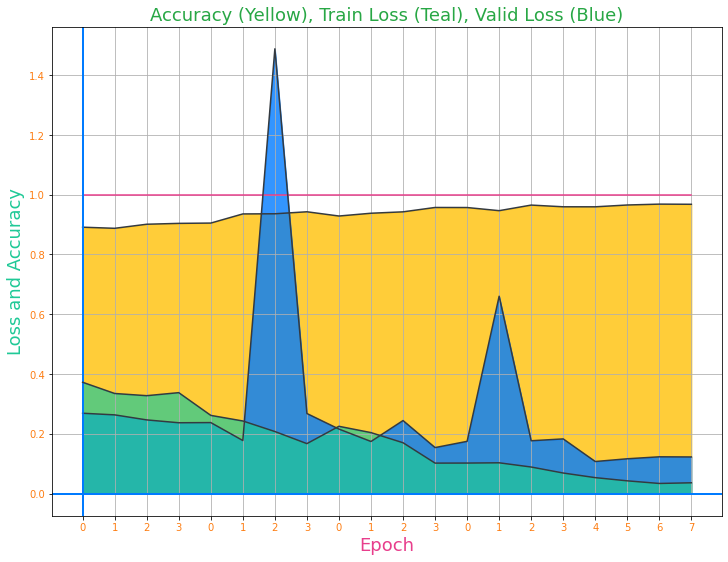

In [ ]:
# do it
henna.draw_loss_acu_result()

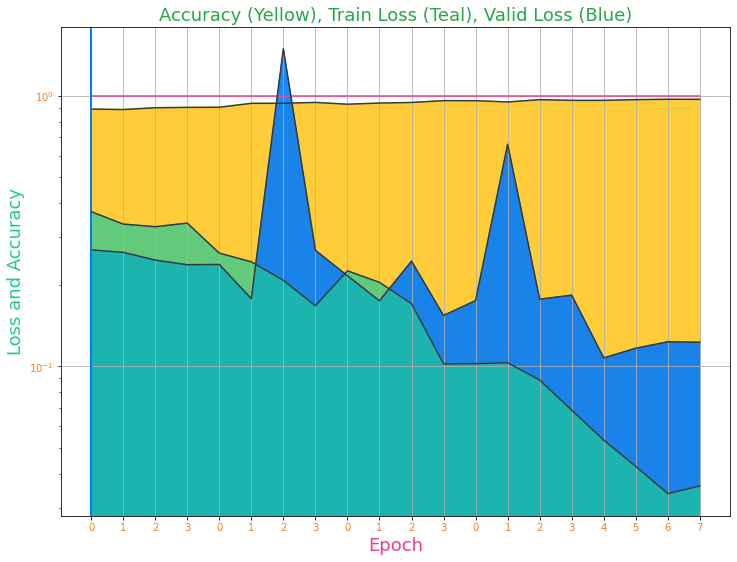

In [ ]:
# do it using logarithmic scale
henna.draw_loss_acu_result(is_logr=True)

In [ ]:
monty.draw.graph_line??

><h2><center>The end.</center></h2>

# 3 - Conclusion




The “d3tz” is a typical Jupyter notebook in my workday. The difference is that the actual notebooks are messier, containing many detours, deadends, and mistakes.

I choose the IMDB data because I can’t share the actual customer data, and I am pleasantly surprised how clean are the movie reviews. The IMDB folks have rightfully deserved the credits for making the NLP data freely available. 

I discovered that graphing NLP data is my secret weapon, especially the “tokenizer graph per file.” I can’t believe that no one does it before. 

Typically, I spend more time cleaning, augmenting, segmenting, and labeling the NLP data in a real-world project. Furthermore, the data scientists and project managers rarely document intentional biases. They are not hard to spot once you compared with the project objectives.

As with the previous “sandbox” project, [the 3D visualizing](https://www.linkedin.com/pulse/python-3d-visualization-hackable-step-by-step-jupyter-duc-haba/), I encourage everyone should publish articles or lessons using the Jupyter notebook. The readers can hack the notebook and make it their own. That’s is where learning truly takes root. It is by reading and doing it.

> <h2>“A doer of deeds…”</h2>

I am looking forward to seeing you again in the next “sandbox” adventure, and if you read this on LinkedIn or GitHub, give me a “thumbs up” and send me feedback.

- LinkedIn, "Demystify Python 3D Visualization -- A Hackable Step-by-step Jupyter Notebook", (add link)

- If you read this on LinkedIn, what are you waiting for? Heading over to Github, using Google Collab or your favorite Jupyter notebook option, and hacking away. (add link)

In [ ]:
# end of jupyter notebook